<img src = "https://freepngimg.com/download/python_logo/7-2-python-logo-free-download-png-thumb.png" width="50"> </p>
*Python 3.10.2*
***
# <font size="5">*Alexander A. Nazarov, 2022*
### <center> <font size="6"> ***Регрессионный анализ в DataScience. Часть 2. <br>Простая линейная регрессия. Преобразование Бокса-Кокса. Проверка тренда и случайности <br>Библиотека statsmodels</p>***

### <center> <font size="6"> ***Regression analysis in DataScience. Part 2. <br>Simple linear regression. Box-Cox Transformation. The test of trend and randomness <br>Module statsmodels</p>***
***

In [1]:
import time
start_time_0 = time.time()

Подключение модулей и библиотек:

In [2]:
# Стандартные модули и библиотеки

import os    # загрузка модуля для работы с операционной системой
import sys
import platform
print('{:<35}{:^0}'.format("Текущая версия Python: ", platform.python_version()), '\n')

import math
from math import *    # подключаем все содержимое модуля math, используем без псевдонимов

import numpy as np
#print ("Текущая версия модуля numpy: ", np.__version__)
print('{:<35}{:^0}'.format("Текущая версия модуля numpy: ", np.__version__))
from numpy import nan

import scipy as sci
print('{:<35}{:^0}'.format("Текущая версия модуля scipy: ", sci.__version__))
import scipy.stats as sps

import pandas as pd
print('{:<35}{:^0}'.format("Текущая версия модуля pandas: ", pd.__version__))

import matplotlib as mpl
print('{:<35}{:^0}'.format("Текущая версия модуля matplotlib: ", mpl.__version__))
import matplotlib.pyplot as plt

import seaborn as sns
print('{:<35}{:^0}'.format("Текущая версия модуля seaborn: ", sns.__version__))

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.descriptivestats import Description
print('{:<35}{:^0}'.format("Текущая версия модуля statsmodels: ", sm.__version__))

import statistics as stat    # module 'statistics' has no attribute '__version__'

import sympy as sym
print('{:<35}{:^0}'.format("Текущая версия модуля sympy: ", sym.__version__))

# Настройки numpy
np.set_printoptions(precision = 4, floatmode='fixed')

# Настройки Pandas
pd.set_option('display.max_colwidth', None)    # текст в ячейке отражался полностью вне зависимости от длины
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Настройки seaborn
sns.set_style("darkgrid")
sns.set_context(context='paper', font_scale=1, rc=None)    # 'paper', 'notebook', 'talk', 'poster', None

# Настройки Mathplotlib
f_size = 8    # пользовательская переменная для задания базового размера шрифта
plt.rcParams['figure.titlesize'] = f_size + 12    # шрифт заголовка
plt.rcParams['axes.titlesize'] = f_size + 10      # шрифт заголовка
plt.rcParams['axes.labelsize'] = f_size + 6       # шрифт подписей осей
plt.rcParams['xtick.labelsize'] = f_size + 4      # шрифт подписей меток
plt.rcParams['ytick.labelsize'] = f_size + 4
plt.rcParams['legend.fontsize'] = f_size + 6      # шрифт легенды
plt.rcParams['text.usetex'] = False    # поддержка TeX

Текущая версия Python:             3.10.2 

Текущая версия модуля numpy:       1.22.2
Текущая версия модуля scipy:       1.8.0
Текущая версия модуля pandas:      1.4.1
Текущая версия модуля matplotlib:  3.5.1
Текущая версия модуля seaborn:     0.11.2
Текущая версия модуля statsmodels: 0.13.2
Текущая версия модуля sympy:       1.9


In [3]:
# Пользовательские модули и библиотеки

Text1 = os.getcwd()    # вывод пути к текущему каталогу
#print(f"Текущий каталог: {Text1}")

sys.path.insert(1, "D:\SKILL FACTORY\REPOSITORY\MyModulePython")

from my_module__stat import *

Прочие настройки:

In [4]:
# Константы
INCH = 25.4    # мм/дюйм
DecPlace = 5    # number of decimal places - число знаков после запятой

Доверительная вероятность и уровень значимости:

In [5]:
p_level = 0.95
a_level = 1 - p_level   

### <center> <font size="6"> <u>***АКТУАЛЬНОСТЬ ТЕМЫ***</u>

В предыдущем обзоре (https://habr.com/ru/post/690414/) мы рассмотрели **простую линейную регрессию (simple linear regression)** - самый простой, стереотипный случай, когда исходные данные подчиняются нормальному закону, имеется сильная линейная корреляционная связь между показателями, отсутствует гетероскедастичность.

В данном обзоре рассмотрим более сложную задачу:
* исходные данные не подчиняются нормальному закону;
* исходные данные представляют собой временные ряды показателей, т.е. возможно возникновение автокорреляции и ложной корреляции.

#### <u>***Применение пользовательских функций***</u>

Как и в предыдущем обзоре, здесь будут использованы несколько пользовательских функций для решения разнообразных задач. Все эти функции созданы для облегчения работы и уменьшения размера программного кода. Данные функции загружается из пользовательского модуля **my_module__stat.py**, который доступен в моем репозитории на GitHub (https://github.com/AANazarov/MyModulePython).

Вот перечень данных функций:
* **df_detection_values** - функция служит для первичной обработки пропусков в **DataFrame**: визуализирует пропуски на тепловой карте (**heatmap**) и определяет их количество;
* **graph_lineplot_sns** - функция позволяет построить линейный график средствами seaborn и сохранить график в виде png-файла;
* **graph_scatterplot_sns** - функция позволяет построить точечную диаграмму средствами seaborn и сохранить график в виде png-файла;
* **graph_hist_boxplot_probplot_sns** и **graph_hist_boxplot_probplot_XY_sns**  - функции позволяют визуализировать исходные данные путем одновременного построения гистограммы, коробчатой диаграммы и вероятностного графика (в первом случае - для одной переменной, во втором случае - для двух переменных X и Y) средствами seaborn и сохранить график в виде png-файла; имеется возможность выбирать, какие графики строить (h - hist, b - boxplot, p - probplot);
* **norm_distr_check** - функция выполняет проверку нормальности распределения исходных данных с использованием набора из нескольких статистических тестов;
* **corr_coef_check**, **corr_ratio_check** и **line_corr_sign_check** - функции, выполняющие проверку значимости коэффициента линейной корреляции Пирсона, корреляционного отношения и проверку гипотезы о значимости отличия линейной корреляционной связи от нелинейной (подробнее об этих функциях я писал в своей статье https://habr.com/ru/post/683442/);
* **regression_error_metrics**  - функция возвращает ошибки аппроксимации регрессионной модели;
* **regression_model_adequacy_check** - проверка адекватности регрессионной модели по критерию Фишера;
* **graph_regression_plot_sns** - функция строит график регрессионной модели и график остатков средствами seaborn;
* **graph_regression_pair_predict_plot_sns** - прогнозирование: построение графика регрессионной модели (с доверительными интервалами) и вывод расчетной таблицы с данными для заданной области значений X;
* **Durbin_Watson_test** - функция выполняет проверку автокорреляции по критерию Дарбина-Уотсона (подробнее об этой функции я писал в своей статье https://habr.com/ru/post/693402/);
* **Goldfeld_Quandt_test**, **Breush_Pagan_test**, **White_test** - проверка гетероскедастичности с использование тестов Голдфелда-Квандта, Бриша-Пэгана и Уайта соответственно;
* **detecting_outliers_mad_test** - функция выполняет проверку наличия аномальных значений (выбросов) по критерию наибольшего абсолютного отклонения <u>для нормально распределенных данных</u> (более подробно - см.[1, с.547]). 

Ряд пользовательских функций мы создаем в процессе данного обзора (они тоже включены в пользовательский модуль **my_module__stat.py**):
* **Mann_Whitney_test_trend_check** - функция проверяет гипотезу о наличии тренда (т.е. существенном различии двух частей временного ряда) по критерию **Манна-Уитни**;
* **rank_corr_coef_check** - функция для расчета, проверки значимости и построения доверительных интервалов коэффициентов ранговой корреляции (Кендалла и Спирмена);
* **Abbe_test** - функция для проверки гипотезы о случайности значений ряда по критерию Аббе (Аббе-Линника);
* **Cox_Stuart_test** - функция для проверки гипотезы о случайности значений ряда по критерию Кокса-Стюарта;
* **Foster_Stuart_test** - функция для проверки гипотезы о случайности значений ряда по критерию Фостера-Стюарта

Для реализации пользовательских функций в каталоге с рабочим файлом ***.ipynb** или ***.py** необходимо создать каталог **table**, в который нужно поместить файлы с табличными значениями ряда критериев:

* **Abbe_test_table.csv** - для критерия Аббе (Аббе-Линника);
* **Durbin_Watson_test_table.csv** - для критерия Дарбина-Уотсона;
* **Epps_Pulley_test_table.csv** - для критерия Эппса-Палли.

Каталог **table** со всеми файлами также доступен в моем репозитории на GitHub (https://github.com/AANazarov/MyModulePython).

### <center> <font size="6"> <u>***ПОСТАНОВКА ЗАДАЧИ***</u>

Рассмотрим задачу нахождения зависимости **среднемесячного расхода топлива автомобиля (л/100 км) (FuelFlow)** от **среднемесячного пробега (км) (Mileage)** (эту же задачу я рассматривал в своей статье **"Расчет и анализ корреляционного отношения средствами Python"** (https://habr.com/ru/post/683442/).

In [6]:
# Общий заголовок проекта
Task_Project = "Анализ расхода топлива легкового автомобиля"

# Заголовок, фиксирующий момент времени
AsOfTheDate = ""

# Заголовок раздела проекта
Task_Theme = ""

# Общий заголовок проекта для графиков
Title_String = f"{Task_Project}\n{AsOfTheDate}"

# Наименования переменных
Variable_Name_T_month = "Ежемесячные данные / Monthly data"
Variable_Name_Y = "Среднемесячный расход топлива (л на 100 км) / FuelFlow"
Variable_Name_X1 = "Пробег автомобиля за месяц (км) / Mileage (km)"
Variable_Name_X2 = "Среднемесячная температура (°С) / Temperature"

### <center> <font size="6"> <u>***ФОРМИРОВАНИЕ ИСХОДНЫХ ДАННЫХ***</u>

Загрузим исходные данные из csv-файла.

**Столбцы таблицы**:

* **Month** — месяц (в формате Excel)
* **Mileage** - месячный пробег (км)
* **Temperature** - среднемесячная температура (°C) 
* **FuelFlow** - среднемесячный расход топлива (л/100 км)

In [7]:
fuel_df = pd.read_csv(filepath_or_buffer='data/FUEL.csv', sep=';')
data_df = fuel_df.copy()    # создаем копию исходной таблицы для работы 
#display(data_df)
display(data_df.head(), data_df.tail())
data_df.info()

,Month,Mileage,Temperature,FuelFlow
0,43252,696.8000,15.2000,10.0800
1,43282,2751.5000,19.4000,8.9100
2,43313,1308.7000,17.9000,7.4500
3,43344,837.4000,12.7000,9.1700
4,43374,2130.8000,5.6000,8.2000


,Month,Mileage,Temperature,FuelFlow
46,44652,800.0000,4.6000,9.6900
47,44682,838.0000,8.8000,8.6500
48,44713,971.0000,16.8000,9.9100
49,44743,1114.0000,20.2000,9.6500
50,44774,1020.0000,20.6000,8.8200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        51 non-null     int64  
 1   Mileage      51 non-null     float64
 2   Temperature  51 non-null     float64
 3   FuelFlow     51 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.7 KB


Краткая описательная статистика исходных данных:

In [8]:
data_df.describe()

,Month,Mileage,Temperature,FuelFlow
count,51.0000,51.0000,51.0000,51.0000
mean,44013.2745,948.3137,6.2059,9.5849
std,452.5532,525.8333,9.8329,2.1791
min,43252.0000,0.0000,-15.3000,0.0000
25%,43632.0000,642.0000,-1.7500,8.7450
50%,44013.0000,840.5000,6.0000,9.6900
75%,44393.5000,1122.0000,15.1500,10.3650
max,44774.0000,2751.5000,20.6000,16.8900


### <center> <font size="6"> <u>***ПЕРВИЧНАЯ ОБРАБОТКА ИСХОДНЫХ ДАННЫХ***</u>

#### <u>***Обработка данных***</u>

**1. Выявление пропущенных значений и их удаление**

Общая информация по набору значений:

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        51 non-null     int64  
 1   Mileage      51 non-null     float64
 2   Temperature  51 non-null     float64
 3   FuelFlow     51 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.7 KB


Для визуализации (маркирования) значений, подлежащих исключению, применим пользовательскую функцию **df_detection_values**, для которой задается список **detection_values** значений, подлежащих маркированию (в нашем случае это пропущенные и нулевые значения: **detection_values=[nan, 0]**). Функция возвращает график тепловой карты (**heatmap**) с маркированным значениями, а также количество маркированных значений по столбцам исходного DataFrame:

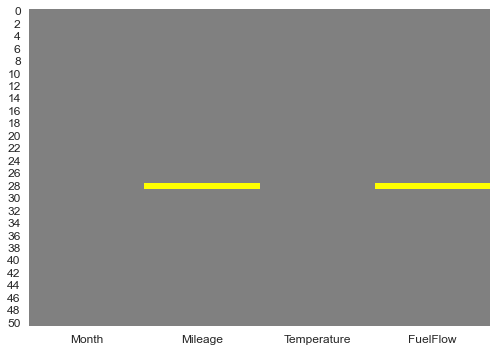

,size,detected values,percentage of detected values
Month,51,0,0.0000
Mileage,51,1,0.0196
Temperature,51,0,0.0000
FuelFlow,51,1,0.0196


In [10]:
result_df, detection_values_df = df_detection_values(data_df, detection_values=[nan, 0])
display(result_df)

**<u>Вывод:</u>** имеются значения, подлежащие удалению.

Исключим пропущенные значения из набора данных:

In [11]:
# формируем список строк, подлежащих удалению
drop_labels = []
for elem in detection_values_df.index:
    if detection_values_df.loc[elem].any():
        drop_labels.append(elem)
#display(drop_labels)

# удаляем строки
data_df = data_df.drop(index=drop_labels)

**2. Преобразование признаков-дат в формат datetime**

Преобразуем дату из формата Excel в формат datetime:

In [12]:
# Преобразуем дату из формата Excel в формат datetime:
data_df['Month'] = pd.to_datetime(
    data_df['Month'],
    dayfirst=True,
    origin='1900-01-01',
    unit='D')

# Сдвигаем дату на конец месяца
data_df['Month'] = data_df['Month'] + \
    pd.tseries.offsets.DateOffset(months=1) + \
        pd.tseries.offsets.DateOffset(days=-3)

# Переименуем столбец
data_df.rename(columns={'Month': 'Date'}, inplace=True)

# Добавляем номер месяца
#fuel_df.insert(0, "Time", range(1, len(fuel_df)+1))                                                

display(data_df.head())
data_df.info()

,Date,Mileage,Temperature,FuelFlow
0,2018-06-30,696.8000,15.2000,10.0800
1,2018-07-31,2751.5000,19.4000,8.9100
2,2018-08-31,1308.7000,17.9000,7.4500
3,2018-09-30,837.4000,12.7000,9.1700
4,2018-10-31,2130.8000,5.6000,8.2000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         50 non-null     datetime64[ns]
 1   Mileage      50 non-null     float64       
 2   Temperature  50 non-null     float64       
 3   FuelFlow     50 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 KB


#### <u>***Сохранение данных***</u>

Сохраняем данные в виде отдельных переменных (для дальнейшего анализа).

Среднемесячный расход топлива (л/100 км) / Fuel Flow (liters per 100 km):

In [13]:
Y = np.array(data_df['FuelFlow'])
print(Y, type(Y), len(Y))

[10.0800  8.9100  7.4500  9.1700  8.2000 10.3000 12.0100 10.1700 11.4900
  9.7200  9.7400  8.8500  8.4500  9.1500  8.6700  7.7200  7.7300 11.6000
 10.9500 11.0400  9.9600 10.8500  8.9600  6.0800 10.2600  9.5700  9.1800
 16.8900 12.7700 10.4300 11.3000 12.9900  9.9400  7.9600  8.9700  9.7200
  8.9700  8.5600 10.0000  8.1900 11.0000  7.8700 10.0300 11.1700  9.0900
  9.6900  8.6500  9.9100  9.6500  8.8200] <class 'numpy.ndarray'> 50


Пробег автомобиля за месяц (км) / Mileage (km):

In [14]:
X = np.array(data_df['Mileage'])
print(X, type(X), len(X))

[ 696.8000 2751.5000 1308.7000  837.4000 2130.8000  704.0000  666.3000
  840.5000  642.0000  900.0000  642.0000 1130.0000  740.0000 1025.0000
 1009.0000 2187.0000 2069.0000  377.0000  393.0000  600.0000  791.0000
  475.0000  265.0000 1334.0000 1079.0000 1229.0000 1335.0000   37.0000
  235.0000  803.0000  575.0000  558.0000  792.0000 1515.0000  878.0000
  733.0000 1379.0000 1534.0000 1025.0000 1236.0000  602.0000 1032.0000
  960.0000  593.0000  976.0000  800.0000  838.0000  971.0000 1114.0000
 1020.0000] <class 'numpy.ndarray'> 50


Дата:

In [15]:
Date = np.array(data_df['Date'])
print(Date, type(Date), len(Date))

['2018-06-30T00:00:00.000000000' '2018-07-31T00:00:00.000000000'
 '2018-08-31T00:00:00.000000000' '2018-09-30T00:00:00.000000000'
 '2018-10-31T00:00:00.000000000' '2018-11-30T00:00:00.000000000'
 '2018-12-31T00:00:00.000000000' '2019-01-31T00:00:00.000000000'
 '2019-02-28T00:00:00.000000000' '2019-03-31T00:00:00.000000000'
 '2019-04-30T00:00:00.000000000' '2019-05-31T00:00:00.000000000'
 '2019-06-30T00:00:00.000000000' '2019-07-31T00:00:00.000000000'
 '2019-08-31T00:00:00.000000000' '2019-09-30T00:00:00.000000000'
 '2019-10-31T00:00:00.000000000' '2019-11-30T00:00:00.000000000'
 '2019-12-31T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-29T00:00:00.000000000' '2020-03-31T00:00:00.000000000'
 '2020-04-30T00:00:00.000000000' '2020-05-31T00:00:00.000000000'
 '2020-06-30T00:00:00.000000000' '2020-07-31T00:00:00.000000000'
 '2020-08-31T00:00:00.000000000' '2020-09-30T00:00:00.000000000'
 '2020-11-30T00:00:00.000000000' '2020-12-31T00:00:00.000000000'
 '2021-01-31T00:00:00.000

Для удобства дальнейшей работы сформируем сформируем отдельный DataFrame из переменных **X**, **Y**:

In [16]:
dataset_df = pd.DataFrame({
    'X': X,
    'Y': Y})
display(dataset_df.head())

,X,Y
0,696.8000,10.0800
1,2751.5000,8.9100
2,1308.7000,7.4500
3,837.4000,9.1700
4,2130.8000,8.2000


Сохраняем данные в **csv**-файл:

In [17]:
dataset_df.to_csv(
    path_or_buf='data/dataset_df.csv',
    mode='w+',
    sep=';',
    index_label='Number')

Сохраняем данные в **xlsx**-файл (возможно, пригодится):

In [18]:
dataset_df.to_excel(
    excel_writer='data/dataset_df.xlsx',
    sheet_name='data')

### <center> <font size="6"> <u>***ОПИСАТЕЛЬНАЯ СТАТИСТИКА И ВИЗУАЛИЗАЦИЯ<br> DESCRIPTIVE STATISTICS WITH VISUALIZATION***</u>

Границы значений переменных (при построении графиков):

In [19]:
(X_min_graph, X_max_graph) = (0, 3000)
(Y_min_graph, Y_max_graph) = (0, 20)

#### <font size="4"> ***Среднемесячный расход топлива / Fuel Flow (Y)***  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


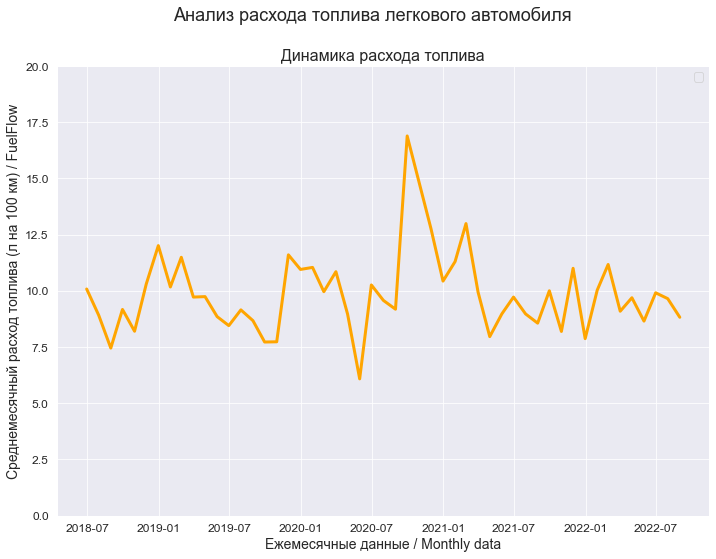

In [20]:
graph_lineplot_sns(
    Date, Y,
    Ymin_in=Y_min_graph, Ymax_in=Y_max_graph,
    color='orange',
    title_figure=Title_String, #title_figure_fontsize=14,
    title_axes='Динамика расхода топлива',
    x_label=Variable_Name_T_month,
    y_label=Variable_Name_Y,
    #label_legend='эмпирические данные',
    file_name='graph/lineplot_Y_sns.png')

#### <font size="4"> ***Пробег автомобиля за месяц / Mileage (X)***  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


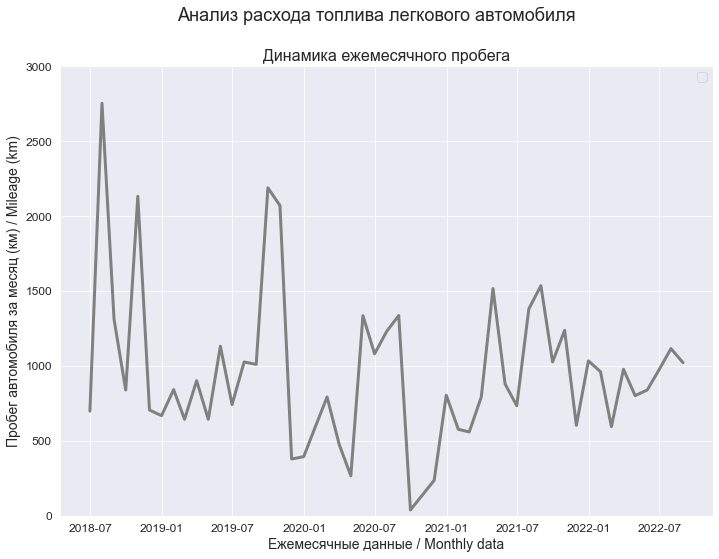

In [21]:
graph_lineplot_sns(
    Date, X,
    Ymin_in=X_min_graph, Ymax_in=X_max_graph,
    color='grey',
    title_figure=Title_String, #title_figure_fontsize=14,
    title_axes='Динамика ежемесячного пробега',
    x_label=Variable_Name_T_month,
    y_label=Variable_Name_X1,
    #label_legend='эмпирические данные',
    file_name='graph/lineplot_X_sns.png')

#### <font size="4"> ***Зависимость расхода топлива (Y) от пробега (X)***

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


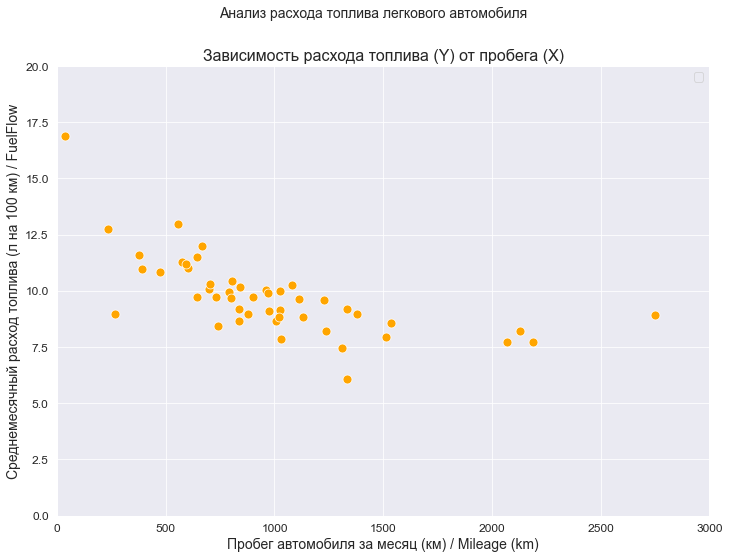

In [22]:
graph_scatterplot_sns(
    X, Y,
    Xmin=X_min_graph, Xmax=X_max_graph,
    Ymin=Y_min_graph, Ymax=Y_max_graph,
    color='orange',
    title_figure=Title_String, title_figure_fontsize=14,
    title_axes='Зависимость расхода топлива (Y) от пробега (X)', title_axes_fontsize=16,
    x_label=Variable_Name_X1,
    y_label=Variable_Name_Y,
    label_fontsize=14, tick_fontsize=12,
    label_legend='', label_legend_fontsize=12,
    s=80,
    #graph_size=(297/INCH, 210/INCH),
    file_name='graph/scatterplot_X_Y_sns.png')

#### <font size="4"> ***Гистограмма / коробчатая диаграмма / вероятностный график***

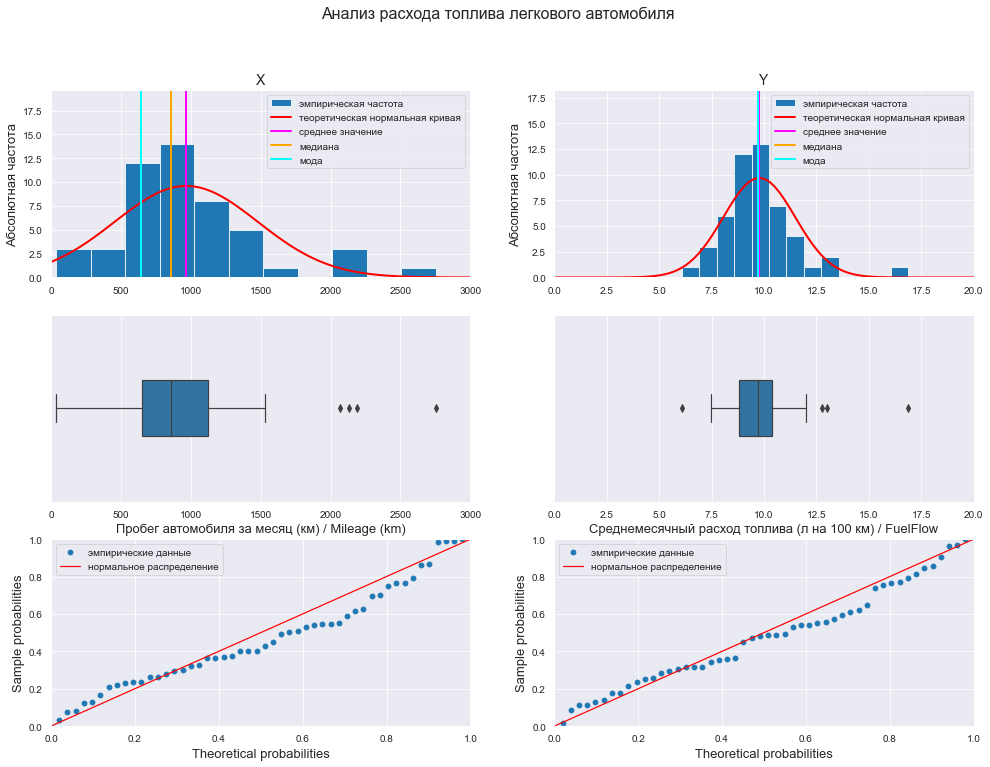

In [23]:
# Пользовательская функция
graph_hist_boxplot_probplot_XY_sns(
    data_X=X, data_Y=Y,
    data_X_min=X_min_graph, data_X_max=X_max_graph,
    data_Y_min=Y_min_graph, data_Y_max=Y_max_graph,  
    graph_inclusion='hbp',    # выбираем для построения виды графиков: b - boxplot, p - probplot)
    data_X_label=Variable_Name_X1,
    data_Y_label=Variable_Name_Y,
    title_figure=Title_String, title_figure_fontsize=16,
    file_name='graph/hist_boxplot_probplot_X_Y_sns.png')    

Для сравнения характера распределений переменных построим совмещенную коробчатую диаграмму по стандартизованным данным:

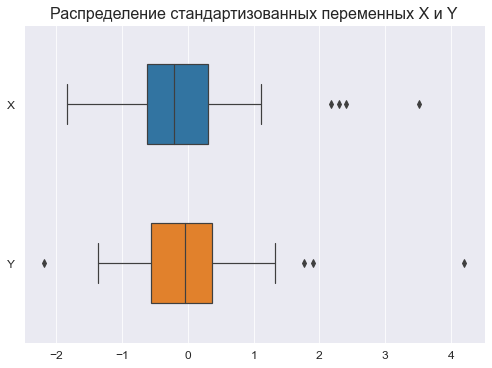

In [24]:
# стандартизуем исходные данные
standardize_df = lambda X: ((X - np.mean(X))/np.std(X))

dataset_df_standardize = dataset_df.copy()
dataset_df_standardize = dataset_df_standardize.apply(standardize_df)
#display(dataset_df_standardize)

# построим график
fig, axes = plt.subplots(figsize=(210/INCH, 297/INCH/2))
axes.set_title("Распределение стандартизованных переменных X и Y", fontsize = 16)
sns.boxplot(
    data=dataset_df_standardize,    
    orient='h',
    width=0.5,
    ax=axes)
plt.show()

Описательная статистика:

In [25]:
result = Description(
    dataset_df,
    stats=["nobs", "missing", "mean", "std_err", "ci", "ci", "std", "iqr", "mad", "coef_var", "range", "max", "min", "skew", "kurtosis", "mode",
           "median", "percentiles", "distinct", "top", "freq"],
    alpha=a_level,
    use_t=True)
display(result.summary())

nobs,50.0,50.0
missing,0.0,0.0
mean,967.28,9.7766
std_err,10.264959059333647,0.03425187878058662
upper_ci,987.9082075086825,9.845431727332194
lower_ci,946.6517924913175,9.707768272667806
std,513.2479529666823,1.7125939390293312
iqr,477.92499999999995,1.5700000000000003
mad,364.3936000000001,1.202192
coef_var,0.5306094956648357,0.1751727532096364
range,2714.5,10.81


<u>**Выводы:**</u>

1. Сравнение показателей среднего арифметического (mean) и медианы (median) свидетельствует:
    - для переменной **X** - о правосторонней асимметрии (т.к. mean > median);
    - для переменной **Y** - о правосторонней асимметрии (т.к. mean > median).<br><br>

2. Значение коэффициента вариации свидетельствует:
    * для переменной **X** - о неоднородности исходных данных (CV = 0.5306 > 0.33);
    * для переменной **Y** - об однородности исходных данных (CV = 0.1751 < 0.33).<br><br>

3. Значение показателя асимметрии skew (As) свидетельствует:
    * для переменной **X** - о значительной правосторонней асимметрии (As = 1.2937, |As| > 0.5, As > 0);
    * для переменной **Y** - о значительной правосторонней асимметрии (As = 1.4066, |As| > 0.5, As > 0).<br><br>

4. Значение показателя асимметрии kurtosis (Es) свидетельствует:
    * для переменной **X** - об островершинном распределении (Es = 5.3008, |Es| > 0);
    * для переменной **Y** - об островершинном распределении (Es = 7.5285, |Es| > 0).<br><br>
  
5. Коробчатые диаграммы показывают наличие аномальных значений (выбросов) для обеих переменных.

6. Вероятностные графики свидетельствует  о том, что скорее всего закон распределения значений обеих переменных отличается от нормального.

### <center> <font size="6"> <u>***ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ***</u>

#### <font size="4"> ***Среднемесячный расход топлива / Fuel Flow (Y)***  

In [26]:
# проверка нормальности распределения
display(norm_distr_check(Y, p_level=p_level))

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.0009,False,0.9075,,,not gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,0.0112,False,0.5650,0.3740,False,not gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.0000,False,25.7621,,,not gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,0.9056,0.7360,False,not gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,0.0000,False,1.0000,,,not gaussian distribution
5,Lilliefors test,0.9500,0.0500,0.0694,True,0.1199,,,gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,0.0000,False,16.6667,,,not gaussian distribution
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.0002,False,3.6712,,,not gaussian distribution


<u>**Вывод:**</u> большинство статистических тестов ОТВЕРГАЮТ гипотезу о нормальном распределении.

#### <font size="4"> ***Пробег автомобиля за месяц / Mileage (X)***  

In [27]:
# проверка нормальности распределения
display(norm_distr_check(X, p_level=p_level))

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.0006,False,0.9036,,,not gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,0.0000,False,1.0320,0.3740,False,not gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.0001,False,18.5843,,,not gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,1.4485,0.7360,False,not gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,0.0000,False,1.0000,,,not gaussian distribution
5,Lilliefors test,0.9500,0.0500,0.0070,False,0.1498,,,not gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,0.0000,False,16.6667,,,not gaussian distribution
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.0005,False,3.4555,,,not gaussian distribution


<u>**Вывод:**</u> большинство статистических тестов ОТВЕРГАЮТ гипотезу о нормальном распределении.

### <center> <font size="6"> <u>***ПРОВЕРКА ТРЕНДА И СЛУЧАЙНОСТИ***</u>

Так как данные представляют собой временные ряды, мы обязаны выполнить проверку тренда и случайности. Наличие трендов в значениях показателей может привести к **ложной корреляции** (вроде зависимостей между числом фильмов с Николасом Кейджем и смертностью людей в бассейнах, или между рождаемостью в Швеции и количеством гнезд аистов - много таких юмористических зависимостей описано в книге Т.Вигена "Ложные корреляции", кто желает, может найти в интернете).

Проверить наличие тренда и случайности можно различными способами:
1. **Проверка разности средних уровней** - самый простой способ: ряд разбивается на 2 части, уровни каждой рассматриваются как отдельные выборки, по каждой выборке рассчитывается среднее значение и проверяется гипотеза о равенстве средних. В случае, если исходные данные распределены нормально, можно воспользоваться критерием Стьюдента, если гипотеза о нормальности отклоняется - существуют непараметрические методы (критерий Манна-Уитни и пр.).
2. **Корреляционный анализ с целью выявления тренда** - расчет и проверка значимости показателей тесноты связи между значениями переменной и временем (номером наблюдения); в случае нормально распределенных данных это может быть коэффициент корреляции Пирсона, в случае отсутствия нормальности - непараметрические показатели (коэффициент ранговой корреляции Спирмена и пр.).
3. **Использование специальных критериев проверки случайности** - таких как критерии Аббе, Фостера-Стюарта и пр.; часто это критерии, основанные на рангах, знаках или сериях.

Примечание: под методами <u>корреляционного анализа (способ 2)</u> мы будем понимать расчет показателей, которые не просто позволяют проверить гипотезу о наличии связи, но и оценить ее силу (т.е. они принимают привычный нам диапазон значений в интервале **[0; 1]** или **[-1; 1]** - например, коэффициенты ранговой корреляции Спирмена и Кендалла), а <u>специальные критерии проверки случайности (способ 3)</u> позволяют только принять или отклонить гипотезу о наличии связи (например, в [1, с.539] описан коэффициент ранговой сериальной корреляции Вальда-Волфовица, который, по сути, является просто критерием, так как может принимать значение больше 1 и не позволяет оценить силу связи).

Для каждого способа можно подобрать как параметрические, так и непараметрические методы (не зависящие от нормальности распределения исходных данных).

В рамках нашего обзора рассмотрим каждый способ.

#### <center> <font size="6"> ***Проверка разности средних уровней***

Так как гипотеза о нормальном распределении исходных данных была отклонена, воспользуемся непараметрическими методами.

В справочнике Кобзаря А.И. [1] данным методам посвящена глава 4.2 [1, с.455]. Автор рассматривает 10 критериев, к сожалению, данных о сравнительной мощности этих критериев не приводится.

Мы воспользуемся из этого перечня **критерием Манна-Уитни** (https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test). Вообще с критерием **Манна-Уитни** ситуация своеобразная - в литературе описаны различные модификации этого критерия, с которыми по-хорошему следует разобраться подробно, однако в данном обзоре мы не будем останавливаться на этом вопросе, а просто воспользуемся функцией **mannwhitneyu**, который входит в стандартный инструментарий **statsmodels** (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).

Для удобства работы создадим пользовательскую функцию **Mann_Whitney_test_trend_check** для проверки гипотезы о наличии тренда по критерию Манна-Уитни:

In [28]:
def Mann_Whitney_test_trend_check(
        data1, data2,    # два части, на которые следует разбить исходный массив значений
        use_continuity=True,    # поправка на непрерывность
        alternative='two-sided',    # вид альтернативной гипотезы
        method='auto',    # метод расчета уровня значимости
        p_level=0.95,
        DecPlace=5):
    
    a_level = 1 - p_level
        
    result = sps.mannwhitneyu(
        data1, data2,
        use_continuity=use_continuity,
        alternative=alternative,
        method=method)
    s_calc = result.statistic    # расчетное значение статистики критерия
    a_calc = result.pvalue    # расчетный уровень значимости
    
    print(f"Расчетное значение статистики критерия: s_calc = {round(s_calc, DecPlace)}")
    print(f"Расчетный уровень значимости: a_calc = {round(a_calc, DecPlace)}")
    print(f"Заданный уровень значимости: a_level = {round(a_level, DecPlace)}")
          
    if a_calc >= a_level:
        conclusion_ShW_test = f"Так как a_calc = {round(a_calc, DecPlace)} >= a_level = {round(a_level, DecPlace)}" + \
            ", то нулевая гипотеза об отсутствии сдвига в выборках ПРИНИМАЕТСЯ, т.е. сдвиг ОТСУТСТВУЕТ"
    else:
        conclusion_ShW_test = f"Так как a_calc = {round(a_calc, DecPlace)} < a_level = {round(a_level, DecPlace)}" + \
            ", то нулевая гипотеза об отсутствии сдвига в выборках ОТКЛОНЯЕТСЯ, т.е. сдвиг ПРИСУТСТВУЕТ"
    print(conclusion_ShW_test)
    return    

#### <font size="4"> ***Среднемесячный расход топлива / Fuel Flow (Y)***  

In [29]:
# разделяем массив исходных данных на две части
N1 = Y.size//2
Y1 = Y[:N1]
Y2 = Y[N1:]

print(f'Y1 = \n{Y1} \nY1.size = {Y1.size}\n')
print(f'Y2 = \n{Y2} \nY1.size = {Y2.size}\n')

# проверяем гипотезу
Mann_Whitney_test_trend_check(Y1, Y2)

Y1 = 
[10.0800  8.9100  7.4500  9.1700  8.2000 10.3000 12.0100 10.1700 11.4900
  9.7200  9.7400  8.8500  8.4500  9.1500  8.6700  7.7200  7.7300 11.6000
 10.9500 11.0400  9.9600 10.8500  8.9600  6.0800 10.2600] 
Y1.size = 25

Y2 = 
[ 9.5700  9.1800 16.8900 12.7700 10.4300 11.3000 12.9900  9.9400  7.9600
  8.9700  9.7200  8.9700  8.5600 10.0000  8.1900 11.0000  7.8700 10.0300
 11.1700  9.0900  9.6900  8.6500  9.9100  9.6500  8.8200] 
Y1.size = 25

Расчетное значение статистики критерия: s_calc = 286.5
Расчетный уровень значимости: a_calc = 0.62074
Заданный уровень значимости: a_level = 0.05
Так как a_calc = 0.62074 >= a_level = 0.05, то нулевая гипотеза об отсутствии сдвига в выборках ПРИНИМАЕТСЯ, т.е. сдвиг ОТСУТСТВУЕТ


<u>**Вывод:**</u> по критерию Манна-Уитни тренд отсутствует.

#### <font size="4"> ***Пробег автомобиля за месяц / Mileage (X)***  

In [30]:
# разделяем массив исходных данных на две части
N1 = X.size//2
X1 = X[:N1]
X2 = X[N1:]

print(f'X1 = \n{X1} \nY1.size = {X1.size}\n')
print(f'X2 = \n{X2} \nY1.size = {X2.size}\n')

# проверяем гипотезу
Mann_Whitney_test_trend_check(X1, X2)

X1 = 
[ 696.8000 2751.5000 1308.7000  837.4000 2130.8000  704.0000  666.3000
  840.5000  642.0000  900.0000  642.0000 1130.0000  740.0000 1025.0000
 1009.0000 2187.0000 2069.0000  377.0000  393.0000  600.0000  791.0000
  475.0000  265.0000 1334.0000 1079.0000] 
Y1.size = 25

X2 = 
[1229.0000 1335.0000   37.0000  235.0000  803.0000  575.0000  558.0000
  792.0000 1515.0000  878.0000  733.0000 1379.0000 1534.0000 1025.0000
 1236.0000  602.0000 1032.0000  960.0000  593.0000  976.0000  800.0000
  838.0000  971.0000 1114.0000 1020.0000] 
Y1.size = 25

Расчетное значение статистики критерия: s_calc = 300.5
Расчетный уровень значимости: a_calc = 0.82342
Заданный уровень значимости: a_level = 0.05
Так как a_calc = 0.82342 >= a_level = 0.05, то нулевая гипотеза об отсутствии сдвига в выборках ПРИНИМАЕТСЯ, т.е. сдвиг ОТСУТСТВУЕТ


<u>**Вывод:**</u> по критерию Манна-Уитни тренд отсутствует.

#### <center> <font size="6"> ***Корреляционный анализ с целью выявления тренда***

Так как гипотеза о нормальном распределении исходных данных была отклонена, применять **коэффициент линейной корреляции Пирсона** или **корреляционное отношение** особого смысла нет - то есть рассчитать эти показатели мы, конечно, можем, но проверять гипотезы об их значимости и строить доверительные интервалы не можем. Рассмотрим непараметрические показатели.

В справочнике Кобзаря А.И. [1] данным методам посвящен раздел 5.2.2.2 [1, с.626]. Автор рассматривает коэффициенты ранговой корреляции Кендалла, Спирмена, Фишера-Йэйтса, Ван дер Вардена, причем указано, что два последних коэффициента наиболее эффективны для нормально распределенных исходных данных.

Мы воспользуемся из этого перечня коэффициентами **Кендалла (τ)** и **Спирмена (ρ)**, которые входят в стандартный инструментарий **statsmodels** - функции **scipy.stats.kendalltau** (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html) и **scipy.stats.spearmanr** (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html).

Не будем глубоко вдаваться в теорию вопроса, отметим только некоторые особенности этих коэффициентов (см. Портал психологических изданий PsyJournals.ru — https://psyjournals.ru/psyedu/2009/n1/Shishlyannikova_full.shtml [Применение корреляционного анализа в психологии - Психологическая наука и образование - 2009. Том. 14, № 1]):
1. Коэффициента ранговой корреляции Кендалла и Спирмена принимают значения в интервале **[-1; 1]**.
2. Как правило, значение коэффициента Спирмена больше, чем значение коэффициента Кендалла: **ρ > τ**.
3. Принципиальных отличий между этими критериями не существует, но принято считать, что коэффициент Кендалла является более «содержательным», так как он более полно и детально анализирует связи между переменными, перебирая все возможные соответствия между парами значений. Коэффициент Спирмена более точно учитывает именно количественную степень связи между переменными.
4. Преимущество коэффициента Спирмена по сравнению с коэффициентом корреляции Пирсона – в большей чувствительности к связи. Его используют в следующих случаях:
    - наличие существенного отклонения распределения хотя бы одной переменной от нормального вида (асимметрия, выбросы);
    - появление криволинейной (монотонной) связи.
5. Ограничением для применения коэффициента Спирмена являются:
    - по каждой переменной не менее 5 наблюдений;
    - коэффициент при большом количестве одинаковых рангов по одной или обеим переменным дает огрубленное значение.
6. Применение коэффициента Кендалла является предпочтительным, если в исходных данных имеются выбросы.
7. Особенностью ранговых коэффициентов корреляции является то, что максимальным по модулю ранговым корреляциям (+1, –1) не обязательно соответствуют строгие прямо или обратно пропорциональные связи между исходными переменными X и Y: достаточна лишь монотонная функциональная связь между ними. Ранговые корреляции достигают своего максимального по модулю значения, если большему значению одной переменной всегда соответствует большее значение другой переменной (+1), или большему значению одной переменной всегда соответствует меньшее значение другой переменной и наоборот (–1).
8. Если статистически достоверная связь не обнаружена, но есть основания полагать, что связь на самом деле есть, следует сначала перейти от коэффициента Спирмена к коэффициенту Кендалла (или наоборот), а затем проверить возможные причины недостоверности связи:
    - нелинейность связи: для этого посмотреть график двумерного рассеивания. Если связь не монотонная, то делить выборку на части, в которых связь монотонная, или делить выборку на контрастные группы и далее сравнивать их по уровню выраженности признака;
    - неоднородность выборки: посмотреть график двумерного рассеивания, попытаться разделить выборку на части, в которых связь может иметь разные направления.
9. Про шкалы измерения силы ранговой корреляции: в монографии [9, с.204] предлагается использовать **шкалу Ивантера-Коросова**, но в более поздней статье [10], обобщающей мировой опыт использования шкал, указано, что для коэффициента Спирмена используют те же шкалы, что и для коэффициента линейной корреляции, а для коэффициента Кендалла вообще не предлагалось никаких шкал. Мы будем использовать **шкалу Эванса** (про нее также см.[10]).

Подробнее об этих коэффициентах - см.[1, с.624; 7, с.106; 9, с.203].

Для удобства работы создадим пользовательскую функцию **rank_corr_coef_check** для расчета, проверки значимости и построения доверительных интервалов коэффициентов ранговой корреляции (Кендалла и Спирмена):

In [31]:
def rank_corr_coef_check(X, Y, p_level=0.95, scale='Evans'):
    a_level = 1 - p_level
    X = np.array(X)
    Y = np.array(Y)
    n_X = len(X)
    n_Y = len(Y)
    # коэффициент ранговой корреляции Кендалл
    rank_corr_coef_tau, a_rank_corr_coef_tau_calc = sps.kendalltau(X, Y)
    # коэффициент ранговой корреляции Спирмена
    rank_corr_coef_spearman, a_rank_corr_coef_spearman_calc = sps.spearmanr(X, Y)
    # критические значения коэффициентов
    if n_X >= 10:
        u_p_tau = sps.norm.ppf(p_level, 0, 1)    # табл.значение квантиля норм.распр.
        rank_corr_coef_tau_crit_value = u_p_tau * sqrt(2*(2*n_X + 5) / (9*n_X*(n_X-1)))
        u_p_spearman = sps.norm.ppf((1+p_level)/2, 0, 1)
        rank_corr_coef_spearman_crit_value = u_p_spearman * 1/sqrt(n_X-1)
    else:
        rank_corr_coef_tau_crit_value = '-'
        rank_corr_coef_spearman_crit_value = '-'
    # проверка гипотезы о значимости
    conclusion_tau = 'significance' if a_rank_corr_coef_tau_calc <= a_level else 'not significance'
    conclusion_spearman = 'significance' if a_rank_corr_coef_spearman_calc <= a_level else 'not significance'
    # оценка тесноты связи
    if scale=='Cheddok':
        conclusion_scale_tau = scale + ': ' + Cheddock_scale_check(rank_corr_coef_tau)
        conclusion_scale_spearman = scale + ': ' + Cheddock_scale_check(rank_corr_coef_spearman)
    elif scale=='Evans':
        conclusion_scale_tau = scale + ': ' + Evans_scale_check(rank_corr_coef_tau)
        conclusion_scale_spearman = scale + ': ' + Evans_scale_check(rank_corr_coef_spearman)
    # доверительные интервалы (только для коэффициента Кендалла - см.[Айвазян, т.2, с.116])
    if conclusion_tau == 'significance':
        rank_corr_coef_tau_delta = sps.norm.ppf((1+p_level)/2, 0, 1) * sqrt(2/n_X * (1 - rank_corr_coef_tau**2))
        rank_corr_coef_tau_int_low = rank_corr_coef_tau - rank_corr_coef_tau_delta if rank_corr_coef_tau - rank_corr_coef_tau_delta else 0
        rank_corr_coef_tau_int_high = rank_corr_coef_tau + rank_corr_coef_tau_delta if rank_corr_coef_tau + rank_corr_coef_tau_delta <= 1 else 1
    # формируем результат            
    result = pd.DataFrame({
        'name': ('Kendall', 'Spearman'),
        'notation': (chr(964), chr(961)),
        'coef_value': (rank_corr_coef_tau, rank_corr_coef_spearman),
        'p_level': (p_level),
        'a_level': (a_level),
        'a_calc': (a_rank_corr_coef_tau_calc, a_rank_corr_coef_spearman_calc),
        'a_calc <= a_level': (a_rank_corr_coef_tau_calc <= a_level, a_rank_corr_coef_spearman_calc <= a_level),
        'crit_value': (rank_corr_coef_tau_crit_value, rank_corr_coef_spearman_crit_value),
        'crit_value >= coef_value': (
            rank_corr_coef_tau >= rank_corr_coef_tau_crit_value if rank_corr_coef_tau_crit_value != '-' else '-',
            rank_corr_coef_spearman >= rank_corr_coef_spearman_crit_value if rank_corr_coef_spearman_crit_value != '-' else '-'),
        'significance_check': (conclusion_tau, conclusion_spearman),
        'conf_int_low': (
            rank_corr_coef_tau_int_low if conclusion_tau == 'significance' else '-',
            '-'),
        'conf_int_high': (
            rank_corr_coef_tau_int_high if conclusion_tau == 'significance' else '-',
            '-'),
        'scale': (conclusion_scale_tau, conclusion_scale_spearman)
        })
    
    return result

#### <font size="4"> ***Среднемесячный расход топлива / Fuel Flow (Y)***  

In [32]:
display(rank_corr_coef_check(dataset_df.index, Y))

,name,notation,coef_value,p_level,a_level,a_calc,a_calc <= a_level,crit_value,crit_value >= coef_value,significance_check,conf_int_low,conf_int_high,scale
0,Kendall,τ,-0.0155,0.9500,0.0500,0.8737,False,0.1605,False,not significance,-,-,Evans: very weak (|r| < 0.19)
1,Spearman,ρ,-0.0101,0.9500,0.0500,0.9443,False,0.2800,False,not significance,-,-,Evans: very weak (|r| < 0.19)


#### <font size="4"> ***Пробег автомобиля за месяц / Mileage (X)***  

In [33]:
display(rank_corr_coef_check(dataset_df.index, X))

,name,notation,coef_value,p_level,a_level,a_calc,a_calc <= a_level,crit_value,crit_value >= coef_value,significance_check,conf_int_low,conf_int_high,scale
0,Kendall,τ,0.0139,0.9500,0.0500,0.8869,False,0.1605,False,not significance,-,-,Evans: very weak (|r| < 0.19)
1,Spearman,ρ,0.0203,0.9500,0.0500,0.8889,False,0.2800,False,not significance,-,-,Evans: very weak (|r| < 0.19)


<u>**Вывод:**</u> коэффициенты ранговой корреляции незначимы, наличие связи между переменными отсутствует.

#### <center> <font size="6"> ***Использование специальных критериев проверки случайности***

В справочнике Кобзаря А.И. [1] рассматривается широкий набор таких критериев:
* в разделе 4.3 - 14 критериев сдвига среднего значения (Аббе-Линника, Фостера-Стюарта, Кокса-Стюарта, Хсу (для сдвига дисперсии), сериальные критерии случайности (4 критерия), критерий инверсий, критерий автокорреляции, критерии ранговой корреляции (4 критерия))
* в разделе 5.2.2 - 7 критериев (Кенуя, Нелсона, квадратный критерий, Олмстеда-Тьюки, Шахани, Блума-Кифера-Розенблата, Гёфдинга, Ширахатэ).

В монографии Лемешко Б.Ю. [3] в разделе 9.2 также рассматриваются критерии тренда и случайности - всего 8 критериев, причем дается сравнительное ранжирование критериев по мощности для обнаружения сдвига среднего значения (по величине убывания мощности) [3, с.462]: Аббе > Кокса-Стюарта > Бартелса > Вальда-Волфовитца > автокорреляции > Фостера-Стюарта.<br>
Как видим, довольно известный критерий Фостера-Стюарта оказался в аутсайдерах по мощности.

Мы воспользуемся из этого перечня критериями **Аббе**, **Кокса-Стюарта** ну и старый добрый критерий **Фостера-Стюарта** не забудем.

#### <u>***Критерий Аббе (Аббе-Линника)***</u>

Информацию про критерий Аббе (Аббе-Динника) можно почерпнуть в [1, с.517], [2, с.62], [6, с.405], [3, с.433].

Данный критерий отличается несколько противоречивыми подходами к аппроксимации критических значений, поэтому разберем его более подробно.

В [2, с.62] и ссылающемся на него [1, с.517] приведена методика методика расчета статистики критерия Аббе (Аббе-Линника), табулированы его критические значения при n ≤ 60, а также порядок аппроксимации критических значений нормальным законом при n > 60. В монографии Лемешко Б.Ю. [3, с.433] приводятся результаты исследования данного критерия методом статистического моделирования.

Данный критерий рекомендован к применению требованиями к измерению физических величин МИ 2091-90 (https://meganorm.ru/Data2/1/4293802/4293802609.htm).

Итак, проверяется **нулевая гипотеза** о <u>равенстве средних</u> (все выборочные значения принадлежат к одной генеральной совокупности), то есть об <u>отсутствии сдвига (тренда)</u>:

$\begin{aligned}
\qquad H_0: \mu_1 = \mu_2 = ... = \mu_n = \mu
\end{aligned}$

против **альтернативной гипотезы** о <u>наличии сдвига (тренда)</u>:

$\begin{aligned}
\qquad H_1: |\mu_{i+1} - \mu_i| > 0, \forall i=\overline{1,n-1}
\end{aligned}$

Расчетное значение статистики критерия имеет вид:

$\begin{aligned}
\qquad q_{calc} = \frac{1}{2} \cdot \frac {\displaystyle\sum_{i=1}^{n-1} (x_{i+1}-x_i)^2} {\displaystyle\sum_{i=1}^{n} (x_{i}-\overline{x})^2}
\end{aligned}$

Критические значения $q_{crit}$ при **n ≤ 60** мы оцифровали ранее.

Условия принятия гипотез:

$\begin{aligned}
\qquad H_0 \: \text{ if } \: q_{calc} \geq q_{crit} \\
\qquad H_1 \: \text{ if } \: q_{calc} < q_{crit}
\end{aligned}$

При **n > 60** для определения табличных значений рекомендована аппроксимация [2, с.62]:

$\begin{aligned}
\qquad q_{crit} = 1 + \frac {u_{1-p}} {\sqrt{n + \frac {1+u_{1-p}^2} {2} }}
\end{aligned}$

где $u_{1-p}$ - квантиль нормального распределения.

Также при **n > 60** можно рассчитать величину:

$\begin{aligned}
\qquad Q_{calc} = -(1-q_{calc}) \cdot \sqrt{\frac {2n+1} {2-(1-q_{calc})^2}}
\end{aligned}$

которая имеет стандартный нормальный закон распределения $N(0, 1)$, тогда условия принятия гипотез будут:

$\begin{aligned}
\qquad H_0 \: \text{ if } \: Q_{calc} \geq Q_{crit} = u_{1-p} \\
\qquad H_1 \: \text{ if } \: Q_{calc} < Q_{crit} = u_{1-p}
\end{aligned}$

Лемешко Б.Ю. в своей монографии [3, с.436] указывает, что при **n > 20** оправданно аппроксимировать распределение величины $q_{calc}$ нормальным законом с параметрами $N(1, \sqrt{\frac {n-2} {n^2-1}})$.

Для удобства работы создадим пользовательскую функцию **Abbe_test** для проверки гипотезы о случайности значений ряда по критерию Аббе (Аббе-Линника):

In [34]:
def Abbe_test(X, p_level=0.95):
    a_level = 1 - p_level
    X = np.array(X)
    n = len(X)
        
    # расчетное значение статистики критерия
    if n >= 4:
        Xmean = np.mean(X)
        sum1 = np.sum((X - Xmean)**2)
        sum2 = np.sum([(X[i+1] - X[i])**2 for i in range(n-1)])
        q_calc = 0.5*sum2/sum1
    else:
        q_calc = '-'
        q_table = '-'
        a_calc = '-'
    
    # табличное значение статистики критерия при 4 <= n <= 60
    if n >= 4 and n <= 60:
        Abbe_table_df = pd.read_csv(
            filepath_or_buffer='table/Abbe_test_table.csv',
            sep=';',
            index_col='n')
        p_level_dict = {
            0.95: Abbe_table_df.columns[0],
            0.99: Abbe_table_df.columns[1]}
        f_lin = sci.interpolate.interp1d(Abbe_table_df.index, Abbe_table_df[p_level_dict[p_level]])
        q_table = float(f_lin(n))
    
    #if n >= 20:
    #    a_calc = 1 - sci.stats.norm.cdf(q_calc, loc=1, scale=sqrt((n-2)/(n**2-1)))
    
    # табличное значение статистики критерия при n > 60 (см.Кобзарь, с.517)
    if n > 60:
        u_p = sps.norm.ppf(1-p_level, 0, 1)
        q_table = 1 + u_p / sqrt(n + 0.5*(1 + u_p**2))
        Q_calc = -(1 - q_calc) * sqrt((2*n + 1)/(2 - (1-q_calc)**2))
        Q_table = u_p
        
    # проверка гипотезы
    if n >= 4:
        conclusion = 'independent observations' if q_calc >= q_table else 'dependent observations'    
    else:        
        conclusion = 'count less than 4'
        
    # формируем результат            
    result = pd.DataFrame({
        'n': (n),
        'p_level': (p_level),
        'a_level': (a_level),
        'q_calc': (q_calc),
        'q_table': (q_table if n >= 4 else '-'),
        'q_calc ≥ q_table': (q_calc >= q_table if n >= 4 else '-'),
        'Q_calc (for n > 60)': (Q_calc if n > 60 else '-'),
        'Q_table': (Q_table if n > 60 else '-'),
        'Q_calc ≥ Q_table': (Q_calc >= Q_table if n > 60 else '-'),
        #'a_calc': (a_calc if n > 20 else '-'),
        #'a_calc ≤ a_level': (a_calc <= a_level if n > 20 else '-'),
        'conclusion': (conclusion)
        },
        index=['Abbe test'])
    
    return result

Протестируем функцию на ряде примеров:

1. Задача №275 из справочника Кобзаря А.И. [1, с.518]:

In [35]:
Task_275 = [4.3, 2.1, 0.9, 5.2, 4.8, 1.2, 0.8, 3.0, 6.1, 10.2]
display(Abbe_test(Task_275))

,n,p_level,a_level,q_calc,q_table,q_calc ≥ q_table,Q_calc (for n > 60),Q_table,Q_calc ≥ Q_table,conclusion
Abbe test,10,0.9500,0.0500,0.4493,0.5311,False,-,-,-,dependent observations


2. Пример 11.6 из [6, с.407]:

In [36]:
cement = [
     40,  33,  75,  18,  62,  33,  38,  69,  65, 100,
     124, 91,  79,  42,  63,  23,  47,  52,  98,  97,
     73,  85,  88,  40,  42,  51,  23,  75,  52, 126,
     90, 111,  92, 109,  72,  28,  56,  17,  52,  68,
     75, 102, 107,  77,  45] 
display(Abbe_test(cement))

,n,p_level,a_level,q_calc,q_table,q_calc ≥ q_table,Q_calc (for n > 60),Q_table,Q_calc ≥ Q_table,conclusion
Abbe test,45,0.9500,0.0500,0.5734,0.7603,False,-,-,-,dependent observations


3. Задача №277 из справочника Кобзаря А.И. [1, с.521]:

In [37]:
Task_277 = [
     12,  1,  2,  4,  6,  9,  5,  3, 14, 21,
     24, 29,  1,  3,  7,  2, 13, 21, 14, 51,
      1,  0,  0, 17, 21,  3,  4,  6,  7,  8,
      9,  1,  2,  3, 12, 11, 10, 21, 74, 35,
     28, 24, 15,  0,  1, 17, 19,  1]

display(Abbe_test(Task_277))

,n,p_level,a_level,q_calc,q_table,q_calc ≥ q_table,Q_calc (for n > 60),Q_table,Q_calc ≥ Q_table,conclusion
Abbe test,48,0.9500,0.0500,0.6188,0.7676,False,-,-,-,dependent observations


4. Пример из монографии Лемешко Б.Ю. [4, с.282] - результаты измерения скорости света (эксперимент Ньюкомба):

In [38]:
Newcomb_Experiment = 24.8 + 10**-3 * np.array([
    28,  26,  33,  24,  34, -44, 27,  16,  40,  -2,
    29,  22,  24,  21,  25,  30,  23,  29,  31,  19,
    24,  20,  36,  32,  36,  28,  25,  21,  28,  29,
    37,  25,  28,  26,  30,  32,  36,  26,  30,  22,
    36,  23,  27,  27,  28,  27,  31,  27,  26,  33,
    26,  32,  32,  24,  39,  28,  24,  25,  32,  25,
    29,  27,  28,  29,  16,  23                
    ])

display(Abbe_test(Newcomb_Experiment))

,n,p_level,a_level,q_calc,q_table,q_calc ≥ q_table,Q_calc (for n > 60),Q_table,Q_calc ≥ Q_table,conclusion
Abbe test,66,0.9500,0.0500,1.1550,0.8003,True,1.2719,-1.6449,True,independent observations


#### <u>***Критерий Кокса-Стюарта***</u>

Информацию про критерий Кокса-Стюарта можно почерпнуть в [1, с.520], [5, с.61].

Согласно Б.Ю. Лемешко [5, с.108], критерий Кокса-Стюарта имеет мощность выше среднего; его недостатком является то, что при **n < 40** необходимо учитывать дискретность нормализованной статистики.

Для удобства работы создадим пользовательскую функцию **Cox_Stuart_test** для проверки гипотезы о случайности значений ряда по критерию Кокса-Стюарта:

In [39]:
def Cox_Stuart_test(data, p_level=0.95):
    a_level = 1 - p_level
    data = np.array(data)
    N = len(data)
    
    # функция, выполняющая процедуру расчета теста Кокса-Стюарта
    def calculate_test(X):
        n = len(X)
        # расчетное значение статистики критерия (тренд средних)
        h = lambda i, j: 1 if X[i] > X[j] else 0
        S = np.sum([(n-2*i+1) * h(i-1, (n-i+1)-1) for i in range(1, n//2 + 1)])
        MS = (n**2)/8
        DS = n*(n**2 - 1) / 24
        S_calc = abs(S - MS) / sqrt(DS)
        # табличное значение статистики критерия (тренд средних)
        S_table = sps.norm.ppf((1+p_level)/2, 0, 1)
        # результат
        return S_calc, S_table
    
    # ПРОВЕРКА ГИПОТЕЗЫ О НАЛИЧИИ ТРЕНДА В СРЕДНЕМ
    (S1_calc, S1_table) = calculate_test(data)
    conclusion_mean = 'independent observations' if S1_calc < S1_table else 'dependent observations'    
    
    # ПРОВЕРКА ГИПОТЕЗЫ О НАЛИЧИИ ТРЕНДА В ДИСПЕРСИИ
    # задаем шкалу для объема подвыборок
    k_scale = [
        [48, 2],
        [64, 3],
        [90, 4]]
    # определяем объем подвыборки
    for i, elem in enumerate(k_scale):
        if N < elem[0]:
            K = elem[1]
            break
        else:
            K = 5
    #print(f'N = {N}')
    #print(f'K = {K}')
    # определяем число подвыборок
    R = N//K
    #print(f'R = {R}')
    # формируем подвыборки
    Subsampling = np.zeros((R, K))
    if not R % 2:    # четное число подвыборок
        R_2 = int(R/2)
        for i in range(R_2):
            Subsampling[i] = [data[i*K + j] for j in range(0, K, 1)]
            Subsampling[R - 1 - i] = [data[N - (i*K + j)] for j in range(K, 0, -1)]
    else:    # нечетное число подвыборок
        R_2 = int((R)/2)+1
        for i in range(R_2):
            Subsampling[i] = [data[i*K + j] for j in range(0, K, 1)]
            Subsampling[R - 1 - i] = [data[N - (i*K + j)] for j in range(K, 0, -1)]
    #print(f'Subsampling = \n{Subsampling}\n')
    # проверка гипотезы
    W = [np.amax(Subsampling[i]) - np.amin(Subsampling[i]) for i in range(R)]    # размахи подвыборок
    #print(f'W = {W}')
    (S2_calc, S2_table) = calculate_test(W)
    conclusion_variance = 'independent observations' if S2_calc < S2_table else 'dependent observations'    
    
    # формируем результат            
    result = pd.DataFrame({
        'n': (N),
        'p_level': (p_level),
        'a_level': (a_level),
        'S_calc': (S1_calc, S2_calc),
        'S_table': (S1_table, S2_table),
        'S_calc < S_table': (S1_calc < S1_table, S2_calc < S2_table),
        'conclusion': (conclusion_mean, conclusion_variance)
        },
        index=['Cox_Stuart_test (trend in means)', 'Cox_Stuart_test (trend in variances)'])
    
    return result

Протестируем функцию на ряде примеров:

1. Задача №277 из справочника Кобзаря А.И. [1, с.521]:

In [40]:
display(Cox_Stuart_test(Task_277))

,n,p_level,a_level,S_calc,S_table,S_calc < S_table,conclusion
Cox_Stuart_test (trend in means),48,0.9500,0.0500,0.6189,1.9600,True,independent observations
Cox_Stuart_test (trend in variances),48,0.9500,0.0500,1.8407,1.9600,True,independent observations


2. Задача №275 из справочника Кобзаря А.И. [1, с.518]:

In [41]:
display(Cox_Stuart_test(Task_275))

,n,p_level,a_level,S_calc,S_table,S_calc < S_table,conclusion
Cox_Stuart_test (trend in means),10,0.9500,0.0500,1.3234,1.9600,True,independent observations
Cox_Stuart_test (trend in variances),10,0.9500,0.0500,0.5031,1.9600,True,independent observations


3. Пример 11.6 из [6, с.407]:

In [42]:
display(Cox_Stuart_test(cement))

,n,p_level,a_level,S_calc,S_table,S_calc < S_table,conclusion
Cox_Stuart_test (trend in means),45,0.9500,0.0500,2.0311,1.9600,False,dependent observations
Cox_Stuart_test (trend in variances),45,0.9500,0.0500,0.2614,1.9600,True,independent observations


1. Пример из [13, с.22]:

In [43]:
crop_capacity = [
    10.3, 14.3,  7.7, 15.8, 14.4, 16.7, 15.3, 20.2, 17.1,  7.7,
    15.3, 16.3, 19.9, 14.4, 18.7, 20.7]

display(Cox_Stuart_test(crop_capacity, p_level=0.9))

,n,p_level,a_level,S_calc,S_table,S_calc < S_table,conclusion
Cox_Stuart_test (trend in means),16,0.9000,0.1000,1.7640,1.6449,False,dependent observations
Cox_Stuart_test (trend in variances),16,0.9000,0.1000,1.5275,1.6449,True,independent observations


5. Пример из монографии Лемешко Б.Ю. [4, с.282] - результаты измерения скорости света (эксперимент Ньюкомба):

In [44]:
display(Cox_Stuart_test(Newcomb_Experiment))

,n,p_level,a_level,S_calc,S_table,S_calc < S_table,conclusion
Cox_Stuart_test (trend in means),66,0.9500,0.0500,0.2604,1.9600,True,independent observations
Cox_Stuart_test (trend in variances),66,0.9500,0.0500,1.3038,1.9600,True,independent observations


#### <u>***Критерий Фостера-Стюарта***</u>

Информацию про критерий Фостера-Стюарта можно почерпнуть в [1, с.519], [3, с.451], [5, с.55].


Для удобства работы создадим пользовательскую функцию **Foster_Stuart_test** для проверки гипотезы о случайности значений ряда по критерию Фостера-Стюарта:

In [45]:
def Foster_Stuart_test(X, p_level=0.95):
    a_level = 1 - p_level
    X = np.array(X)
    n = len(X)
        
    # расчетные значения статистики критерия
    u = l = list()
    Xtemp = np.array(X[0])
    for i in range(1, n):
        Xmax = np.max(Xtemp)
        Xmin = np.min(Xtemp)
        u = np.append(u, 1 if X[i] > Xmax else 0)
        l = np.append(l, 1 if X[i] < Xmin else 0)
        Xtemp = np.append(Xtemp, X[i])
                
    d = np.int64(np.sum(u - l))
    S = np.int64(np.sum(u + l))
        
    # нормализованные расчетные значения статистики критерия
    mean_d = 0
    mean_S = 2*np.sum([1/i for i in range(2, n+1)])
    std_d = sqrt(mean_S)
    std_S = sqrt(mean_S - 4*np.sum([1/i**2 for i in range(2, n+1)]))
    
    '''print(f'mean_d = {mean_d}')
    print(f'std_d = {std_d}')
    print(f'mean_S = {mean_S}')
    print(f'std_S = {std_S}')'''
    
    t_d = (d - mean_d)/std_d
    t_S = (S - mean_S)/std_S
    
    # табличные значения статистики критерия    
    df = n
    t_table = sci.stats.t.ppf((1 + p_level)/2 , df)
    
    # проверка гипотезы
    conclusion_d = 'independent observations' if t_d <= t_table else 'dependent observations'
    conclusion_S = 'independent observations' if t_S <= t_table else 'dependent observations'
    
    # формируем результат            
    result = pd.DataFrame({
        'n': (n),
        'p_level': (p_level),
        'a_level': (a_level),
        'notation': ('d', 'S'),
        'statistic': (d, S),
        'normalized_statistic': (t_d, t_S),
        'crit_value': (t_table),
        'normalized_statistic ≤ crit_value': (t_d <= t_table, t_S <= t_table),
        'conclusion': (conclusion_d, conclusion_S)
        },
        index=['Foster_Stuart_test (trend in means)', 'Foster_Stuart_test (trend in variances)'])
    
    return result

Протестируем функцию на ряде примеров:

1. Задача №276 из справочника Кобзаря А.И. [1, с.520] (исходные данные, как в задаче №275):

In [46]:
display(Foster_Stuart_test(Task_275))

,n,p_level,a_level,notation,statistic,normalized_statistic,crit_value,normalized_statistic ≤ crit_value,conclusion
Foster_Stuart_test (trend in means),10,0.9500,0.0500,d,0,0.0000,2.2281,True,independent observations
Foster_Stuart_test (trend in variances),10,0.9500,0.0500,S,6,1.6631,2.2281,True,independent observations


2. Пример из [13, с.22]:

In [47]:
display(Foster_Stuart_test(crop_capacity, p_level=0.9))

,n,p_level,a_level,notation,statistic,normalized_statistic,crit_value,normalized_statistic ≤ crit_value,conclusion
Foster_Stuart_test (trend in means),16,0.9000,0.1000,d,4,1.8331,1.7459,False,dependent observations
Foster_Stuart_test (trend in variances),16,0.9000,0.1000,S,6,0.7955,1.7459,True,independent observations


3. Задача №277 из справочника Кобзаря А.И. [1, с.521]:

In [48]:
display(Foster_Stuart_test(Task_277))

,n,p_level,a_level,notation,statistic,normalized_statistic,crit_value,normalized_statistic ≤ crit_value,conclusion
Foster_Stuart_test (trend in means),48,0.9500,0.0500,d,4,1.5208,2.0106,True,independent observations
Foster_Stuart_test (trend in variances),48,0.9500,0.0500,S,8,0.5148,2.0106,True,independent observations


4. Пример 11.6 из [6, с.407]:

In [49]:
display(Foster_Stuart_test(cement))

,n,p_level,a_level,notation,statistic,normalized_statistic,crit_value,normalized_statistic ≤ crit_value,conclusion
Foster_Stuart_test (trend in means),45,0.9500,0.0500,d,1,0.3838,2.0141,True,independent observations
Foster_Stuart_test (trend in variances),45,0.9500,0.0500,S,7,0.1013,2.0141,True,independent observations


5. Пример из монографии Лемешко Б.Ю. [4, с.282] - результаты измерения скорости света (эксперимент Ньюкомба):

In [50]:
display(Foster_Stuart_test(Newcomb_Experiment))

,n,p_level,a_level,notation,statistic,normalized_statistic,crit_value,normalized_statistic ≤ crit_value,conclusion
Foster_Stuart_test (trend in means),66,0.9500,0.0500,d,0,0.0000,1.9966,True,independent observations
Foster_Stuart_test (trend in variances),66,0.9500,0.0500,S,6,-0.6907,1.9966,True,independent observations


#### <u>***Сравнение результатов тестирования критериев***</u>

Результаты проверки наличия тренда в среднем:

|Задачи                 |Критерий Аббе|Критерий Кокса-Стюарта|Критерий Фостера-Стюарта|
|:---------------------:|:-----------:|:--------------------:|:----------------------:|
|Задача №275 [1, с.518] |да           |нет                   |нет                     |
|Задача №277 [1, с.521] |да           |нет                   |нет                     |
|Пример 11.6 [6, с.407] |да           |да                    |нет                     |
|Пример из [13, с.22]   |-            |да                    |да                      |
|Пример из [4, с.282]   |нет          |нет                   |нет                     |

Результаты проверки наличия тренда в дисперсии:

|Задачи                 |Критерий Кокса-Стюарта|Критерий Фостера-Стюарта|
|:---------------------:|:--------------------:|:----------------------:|
|Задача №275 [1, с.518] |нет                   |нет                     |
|Задача №277 [1, с.521] |нет                   |нет                     |
|Пример 11.6 [6, с.407] |нет                   |нет                     |
|Пример из [13, с.22]   |нет                   |нет                     |
|Пример из [4, с.282]   |нет                   |нет                     |

Сравнивая результаты тестирования рассмотренных критериев на различных примерах, увидим, что критерий Аббе (Аббе-Линника) при проверке наличия тренда в среднем часто дает результаты, отличные от результатов применения остальных критериев. С этим критерием все не так однозначно и это заслуживает отдельного исследования.

#### <u>***Проверка наших данных на наличие тренда***</u>

#### <font size="4"> ***Среднемесячный расход топлива / Fuel Flow (Y)***  

In [51]:
display(Abbe_test(Y))
display(Cox_Stuart_test(Y))
display(Foster_Stuart_test(Y))

,n,p_level,a_level,q_calc,q_table,q_calc ≥ q_table,Q_calc (for n > 60),Q_table,Q_calc ≥ Q_table,conclusion
Abbe test,50,0.9500,0.0500,0.7343,0.7718,False,-,-,-,dependent observations


,n,p_level,a_level,S_calc,S_table,S_calc < S_table,conclusion
Cox_Stuart_test (trend in means),50,0.9500,0.0500,0.1178,1.9600,True,independent observations
Cox_Stuart_test (trend in variances),50,0.9500,0.0500,0.0767,1.9600,True,independent observations


,n,p_level,a_level,notation,statistic,normalized_statistic,crit_value,normalized_statistic ≤ crit_value,conclusion
Foster_Stuart_test (trend in means),50,0.9500,0.0500,d,0,0.0000,2.0086,True,independent observations
Foster_Stuart_test (trend in variances),50,0.9500,0.0500,S,6,-0.4708,2.0086,True,independent observations


<u>**Вывод:**</u> большинство тестов позволяют сделать вывод об отсутствии тренда (за исключением критерия Аббе).

#### <font size="4"> ***Пробег автомобиля за месяц / Mileage (X)***  

In [52]:
display(Abbe_test(X))
display(Cox_Stuart_test(X))
display(Foster_Stuart_test(X))

,n,p_level,a_level,q_calc,q_table,q_calc ≥ q_table,Q_calc (for n > 60),Q_table,Q_calc ≥ Q_table,conclusion
Abbe test,50,0.9500,0.0500,0.8305,0.7718,True,-,-,-,independent observations


,n,p_level,a_level,S_calc,S_table,S_calc < S_table,conclusion
Cox_Stuart_test (trend in means),50,0.9500,0.0500,0.0624,1.9600,True,independent observations
Cox_Stuart_test (trend in variances),50,0.9500,0.0500,0.3068,1.9600,True,independent observations


,n,p_level,a_level,notation,statistic,normalized_statistic,crit_value,normalized_statistic ≤ crit_value,conclusion
Foster_Stuart_test (trend in means),50,0.9500,0.0500,d,-4,-1.5120,2.0086,True,independent observations
Foster_Stuart_test (trend in variances),50,0.9500,0.0500,S,6,-0.4708,2.0086,True,independent observations


<u>**Вывод:**</u> все тесты позволяют сделать вывод об отсутствии тренда.

#### <u>***Сводка результатов проверки наличия тренда***</u>

|Тесты                   |Переменная Y|Переменная X| 
|:----------------------:|:----------:|:----------:|
|Критерий Манна-Уитни    |нет         |нет         |
|Коэффициент Кендалла    |нет         |нет         | 
|Коэффициент Спирмена    |нет         |нет         |
|Критерий Аббе           |да          |нет         |
|Критерий Кокса-Стюарта  |нет         |нет         |
|Критерий Фостера-Стюарта|нет         |нет         |

<u>**Вывод:**</u> по совокупности результатов проверки большинство тестов позволяют сделать вывод об отсутствии тренда.

### <center> <font size="6"> <u>***ПРЕОБРАЗОВАНИЕ ДАННЫХ К НОРМАЛЬНОМУ ЗАКОНУ РАСПРЕДЕЛЕНИЯ***</u>

#### <u>***Основы теории***</u>

Очень кратко вспомним основы теории (очень неплохо данные вопросы изложены в [11, глава 6]).

Мы прекрасно понимаем, что нормальное распределение - это не более, чем теоретическая модель реальных распределений, и на практике реальные данные подчиняются нормальному закону лишь более или менее приблизительно.

В чем же **важность нормального распределения для регрессионного анализа**?

1. При нарушении нормальности распределения оценки параметров регрессионных моделей, полученные методом наименьших квадратов (МНК-оценки) теряют свойство эффективности (хотя сохраняют свойства несмещенности и состоятельности).   
2. В случае нарушения нормальности, особенно для распределений с "тяжелыми хвостами" возрастает вероятность появления статистически аномальных значений (выбросов), к которым МНК является очень чувствительным; один такой выброс может кардинально изменить значения параметров модели, полностью исказив картину.   
3. В случае нормального распределения имеется прекрасно разработанный математический аппарат проверки гипотез. Непараметрический инструментарий не так обширен (например, критерии отсева выбросов привязаны к конкретному распределению (см. [1]); как быть исследователю, если условие нормальности не выполняется, а проверку на выбросы выполнить необходимо?).

В [11] приводятся данные об исследованиях устойчивости критериев проверки гипотез регрессионного анализа к нарушению нормальности распределения исходных данных. Установлено следующее:

1. В целом критерии для математического ожидания (критерий Стьюдента) сравнительно устойчивы к отклонениям от нормальности, а вот критерии для дисперсии (Фишера, Бартлетта) наоборот - весьма чувствительны [11, с.197].

2. При проверке гипотезы с использованием критерия Фишера нарушение нормальности влияет на распределение F-статистики критерия. Предложены корректировки числа степеней свободы для табличных значений статистики критерия [11, с.220-227].

#### <u>***Преобразование Бокса-Кокса***</u>

Правила преобразования данных к нормальному закону возможны самые разные (степенное, логарифмическое, обратное, обратного корня и т.д.) [14, с.39] в зависимости от асимметрии исходного распределения. Г.Бокс и Д.Кокс предложили (Box, G. E. P.; Cox, D. R. An analysis of transformations. (With discussion). J. Roy. Statist. Soc. Ser. B 26 (1964), 211–252. https://mathscinet.ams.org/mathscinet-getitem?mr=192611) более формализованную процедуру. Преобразование Бокса-Кокса имеет вид:

$\begin{aligned}
\qquad \tilde{y_i} = 
\begin{cases}
    \frac {{y_i}^{\lambda}-1} {\lambda} & \quad \text{if } {\lambda} \neq 0\\
    ln(y_i) & \quad \text{if } {\lambda} = 0
\end{cases}
\end{aligned}$

Оптимальное значение параметра $\lambda$ может быть найдено методом наибольшего правдоподобия. Подробнее про преобразование Бокса-Кокса - см. [8, с.180], а также https://translated.turbopages.org/proxy_u/en-ru.ru.2cfa6599-63444eca-ccb2e8d4-74722d776562/https/en.wikipedia.org/wiki/Box-Cox_transformation,  http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%91%D0%BE%D0%BA%D1%81%D0%B0-%D0%9A%D0%BE%D0%BA%D1%81%D0%B0.

Обратное преобразование имеет вид:

$\begin{aligned}
\qquad {y_i} = 
\begin{cases}
    {(1+\lambda \cdot \tilde{y_i})^{\frac {1} {\lambda}}} & \quad \text{if } {\lambda} \neq 0\\
    e^{\tilde{y_i}} & \quad \text{if } {\lambda} = 0
\end{cases}
\end{aligned}$

В процессе регрессионного анализа преобразованию Бокса-Кокса может быть подвергнута одна или несколько переменных.

Предположим, в случае **simple linear regression**

$\begin{aligned}
\qquad y_i = b_0 + b_1 \cdot x_i + \varepsilon_i
\end{aligned}$

закон распределения обеих переменных $y$ и $x$ отличается от нормального, и обе переменные подвергаются преобразованию Бокса-Кокса:

$\begin{aligned}
\qquad \tilde{y_i} = \frac {{y_i}^{\lambda_y}-1} {\lambda_y}
\end{aligned}$

$\begin{aligned}
\qquad \tilde{x_i} = \frac {{x_i}^{\lambda_x}-1} {\lambda_x}
\end{aligned}$

Оценивать методом наименьших квадратов мы будем не параметры $b_0$ и $b_1$ исходной модели, а параметры $\tilde{b}_0$ и $\tilde{b}_1$ модели, построенной по преобразованным данным:

$\begin{aligned}
\qquad \tilde{y}_i = \tilde{b}_0 + \tilde{b}_1 \cdot \tilde{x}_i + \tilde{\varepsilon}_i
\end{aligned}$

Чтобы перейти от модели, построенной по преобразованным данным, к исходной модели, необходимо выполнить обратное преобразование (при ${\lambda_x}, {\lambda_y} \neq 0$):

$\begin{aligned}
\qquad y_i = (1+\lambda_y \cdot \tilde{y}_i)^{\frac {1} {\lambda_y}} = (1+\lambda_y \cdot (\tilde{b}_0+\tilde{b}_1 \cdot \tilde{x}_i))^{\frac {1} {\lambda_y}} = (1+\lambda_y \cdot (\tilde{b}_0+\tilde{b}_1 \cdot {\frac {{x_i}^{\lambda_x}-1} {\lambda_x}}))^{\frac {1} {\lambda_y}}
\end{aligned}$



То есть, мы видим, что преобразование Бокса-Кокса превращает по сути превращает линейную регрессионную модель в нелинейную. В этом случае может возникнуть проблема с интерпретацией параметров. Вообще, вопросов с преобразованием Бокса-Кокса немало, но не будем пока останавливаться на них, а двинемся далее.

Определим ряд лямбда-функций, которые потребуются нам в дальнейшем при анализе регрессионных моделей с учетом преобразования Бокса-Кокса (будем использовать суффикс **_func**, чтобы не путать наименования функций с именами регрессионных моделей, которые используются при работе с модулем линейной регрессии **Linear Regression** (https://www.statsmodels.org/stable/regression.html):

1. Функция линейной регрессионной модели (SLRM - simple linear regression model):

In [53]:
SLRM_func = lambda x, b0, b1: b0 + b1*x

2. Функция преобразования Бокса-Кокса:

In [54]:
boxcox_func = lambda x, lmbd: (x**lmbd - 1) / lmbd if lmbd != 0 else log(x)

3. Функция преобразования, обратного преобразованию Бокса-Кокса:

In [55]:
inverse_boxcox_func = lambda x, lmbd: (1 + lmbd*x)**(1/lmbd) if lmbd != 0 else exp(x)

4. Функция для обратного преобразования регрессионной модели - позволяет восстановить значения переменной $y$ в зависимости от $x$ по регрессионной модели, построенной при преобразовании Бокса-Кокса:

In [56]:
inverse_boxcox_SLRM_func = lambda x, b0_boxcox, b1_boxcox, lmbd_x, lmbd_y: inverse_boxcox_func(SLRM_func(boxcox_func(x, lmbd_x), b0_boxcox, b1_boxcox), lmbd_y)

В этой функции использованы переменные:
* **x** - исходные значения независимой переменной $x$;
* **b0_boxcox** и **b1_boxcox** - параметры $\tilde{b}_0$ и $\tilde{b}_1$ модели, построенной по преобразованным данным;
* **lmbd_x** и **lmbd_y** - параметры ${\lambda_x}$ и ${\lambda_y}$ преобразования Бокса-Кокса.

Функция возвращает расчетные значения переменной $y$, оцененные по регрессионной модели $ \tilde{y}_i = \tilde{b}_0 + \tilde{b}_1 \cdot \tilde{x}_i + \tilde{\varepsilon}_i $ уже после обратного преобразования.

С помощью функции **inverse_boxcox_SLRM_func** мы сможем получать прогнозные значения переменной $y$, а с помощью функции **inverse_boxcox_func** - значения границ доверительных интервалов.

Далее выполним преобразование Бокса-Кокса для переменных в нашей задаче с использованием стандартного инструментария **scipy**.

#### <font size="4"> ***Среднемесячный расход топлива / Fuel Flow (Y)***  

Выполним преобразование Бокса-Кокса:

Y = [10.0800  8.9100  7.4500  9.1700  8.2000 10.3000 12.0100 10.1700 11.4900
  9.7200  9.7400  8.8500  8.4500  9.1500  8.6700  7.7200  7.7300 11.6000
 10.9500 11.0400  9.9600 10.8500  8.9600  6.0800 10.2600  9.5700  9.1800
 16.8900 12.7700 10.4300 11.3000 12.9900  9.9400  7.9600  8.9700  9.7200
  8.9700  8.5600 10.0000  8.1900 11.0000  7.8700 10.0300 11.1700  9.0900
  9.6900  8.6500  9.9100  9.6500  8.8200]

lmax_pearsonr_Y = -0.4955780253378136	 lmax_mle_Y = -0.5125502778940741

Y_boxcox = [1.3541 1.3151 1.2540 1.3244 1.2875 1.3606 1.4053 1.3568 1.3928 1.3428
 1.3435 1.3129 1.2976 1.3237 1.3061 1.2666 1.2671 1.3955 1.3789 1.3813
 1.3504 1.3762 1.3169 1.1775 1.3595 1.3380 1.3248 1.4928 1.4222 1.3644
 1.3880 1.4268 1.3498 1.2773 1.3173 1.3428 1.3173 1.3019 1.3516 1.2870
 1.3802 1.2733 1.3526 1.3847 1.3216 1.3419 1.3054 1.3488 1.3406 1.3118]

Y_boxcox1 = [1.3541 1.3151 1.2540 1.3244 1.2875 1.3606 1.4053 1.3568 1.3928 1.3428
 1.3435 1.3129 1.2976 1.3237 1.3061 1.2666 1.2671 1.3955 1.3789 

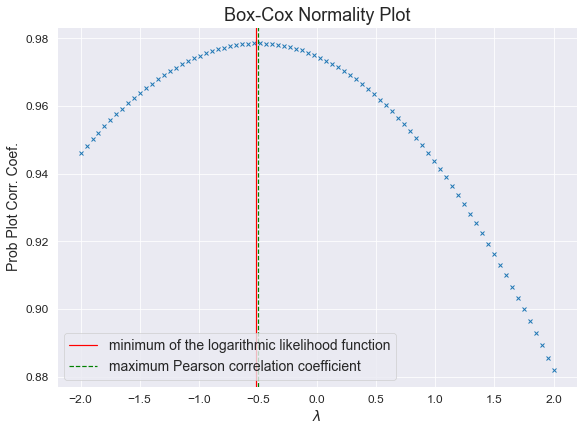

In [57]:
data = Y
print(f"Y = {Y}\n")
# Определяем оптимальный параметр преобразования Бокса-Кокса
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox_normmax.html#scipy.stats.boxcox_normmax
lmax_pearsonr_Y, lmax_mle_Y = sci.stats.boxcox_normmax(data, method='all')    
print(f"lmax_pearsonr_Y = {lmax_pearsonr_Y}\t lmax_mle_Y = {lmax_mle_Y}\n")

# Выполняем преобразование Бокса-Кокса
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html#scipy.stats.boxcox
Y_boxcox = sci.stats.boxcox(data, lmbda=(lmax_mle_Y))
print(f"Y_boxcox = {Y_boxcox}\n")

# Проверяем преобразование Бокса-Кокса
Y_boxcox1 = boxcox_func(Y, lmax_mle_Y) 
print(f"Y_boxcox1 = {Y_boxcox1}\n")

# Проверяем обратное преобразование
Y_inverse_boxcox = inverse_boxcox_func(Y_boxcox, lmax_mle_Y)
print(f"Y_inverse_boxcox = {Y_inverse_boxcox}\n")

# Постоим график преобразования Бокса-Кокса
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox_normplot.html
fig, axes = plt.subplots(figsize=(297/INCH/1.254, 210/INCH/1.25))
sci.stats.boxcox_normplot(data, -2, 2, plot=axes)
axes.axvline(lmax_mle_Y, color='r', label = 'minimum of the logarithmic likelihood function')
axes.axvline(lmax_pearsonr_Y, color='g', ls='--', label = 'maximum Pearson correlation coefficient')
axes.grid(True)
axes.legend()
plt.show()
fig.savefig('graph/FuelFlow_boxcox_transform.jpg', orientation = "portrait", dpi = 300)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox_llf.html#scipy.stats.boxcox_llf


Визуализация и проверка нормальности распределения после преобразование Бокса-Кокса:

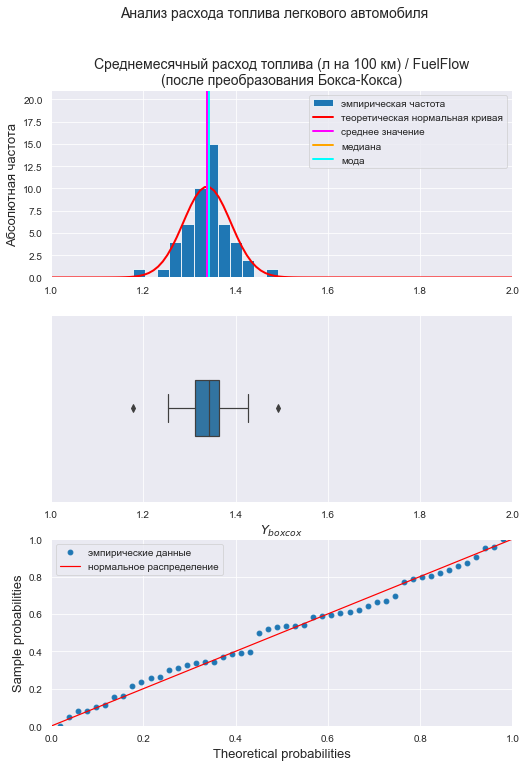

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.2944,True,0.9726,,,gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,0.2791,True,0.1646,0.3740,True,gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.0889,True,4.8410,,,gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,0.3700,0.7360,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,0.0000,False,0.8805,,,not gaussian distribution
5,Lilliefors test,0.9500,0.0500,0.7569,True,0.0712,,,gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,0.0000,False,12.3221,,,not gaussian distribution
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.8809,True,-0.1498,,,gaussian distribution


Проверка наличия выбросов переменной Y (после преобразования Бокса-Кокса):



,value,mad_calc,mad_table,outlier_conclusion
23,1.1775,3.1269,1.1369,outlier
2,1.2540,1.6381,1.1369,outlier
15,1.2666,1.3929,1.1369,outlier
16,1.2671,1.3841,1.1369,outlier
41,1.2733,1.2622,1.1369,outlier
33,1.2773,1.1856,1.1369,outlier
6,1.4053,1.3064,1.1369,outlier
28,1.4222,1.6351,1.1369,outlier
31,1.4268,1.7248,1.1369,outlier
27,1.4928,3.0090,1.1369,outlier


In [58]:
# визуализация
graph_hist_boxplot_probplot_sns(
    data=Y_boxcox,
    data_min=1.0, data_max=2.0,  
    graph_inclusion='hbp',
    data_label=r'$Y_{boxcox}$',
    title_figure=Title_String, title_figure_fontsize=14,
    title_axes=Variable_Name_Y + "\n(после преобразования Бокса-Кокса)",
    file_name='graph/hist_boxplot_probplot_Y_boxcox_sns.png')    

# проверка нормальности распределения
display(norm_distr_check (Y_boxcox, p_level=0.95))

# проверка наличия выбросов
print("Проверка наличия выбросов переменной Y (после преобразования Бокса-Кокса):\n")
result = detecting_outliers_mad_test(Y_boxcox)
mask = (result['outlier_conclusion'] == 'outlier')
display(result[mask])

<u>**Вывод:**</u> большинство статистических тестов ПРИНИМАЮТ гипотезу о нормальном распределении, преобразованные данные можно считать нормально распределенными.

#### <font size="4"> ***Пробег автомобиля за месяц / Mileage (X)***  

Выполним преобразование Бокса-Кокса:

X = [ 696.8000 2751.5000 1308.7000  837.4000 2130.8000  704.0000  666.3000
  840.5000  642.0000  900.0000  642.0000 1130.0000  740.0000 1025.0000
 1009.0000 2187.0000 2069.0000  377.0000  393.0000  600.0000  791.0000
  475.0000  265.0000 1334.0000 1079.0000 1229.0000 1335.0000   37.0000
  235.0000  803.0000  575.0000  558.0000  792.0000 1515.0000  878.0000
  733.0000 1379.0000 1534.0000 1025.0000 1236.0000  602.0000 1032.0000
  960.0000  593.0000  976.0000  800.0000  838.0000  971.0000 1114.0000
 1020.0000]

lmax_pearsonr_X = 0.5213631177357395	 lmax_mle = 0.5064088540402572

X_boxcox = [ 52.3846 107.0004  72.8240  57.6873  93.7672  52.6683  51.1664  57.7991
  50.1759  59.9057  50.1759  67.4645  54.0659  64.1184  63.5939  95.0378
  92.3508  37.8526  38.6998  48.4193  55.9897  42.7966  31.3412  73.5528
  65.8593  70.4814  73.5815  10.3181  29.3747  56.4333  47.3448  46.6010
  56.0268  78.5794  59.1350  53.7969  74.8325  79.0895  64.1184  70.6901
  48.5043  64.3466  61.9616  48.1207  62.

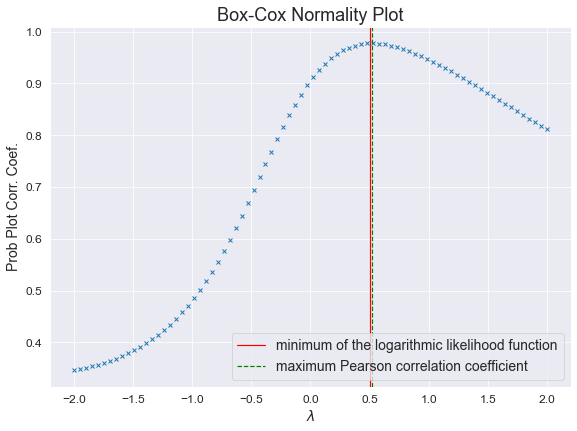

In [59]:
data = X
print(f"X = {X}\n")
# Определяем оптимальный параметр преобразования Бокса-Кокса
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox_normmax.html#scipy.stats.boxcox_normmax
lmax_pearsonr_X, lmax_mle_X = sci.stats.boxcox_normmax(data, method='all')    
print(f"lmax_pearsonr_X = {lmax_pearsonr_X}\t lmax_mle = {lmax_mle_X}\n")

# Выполняем преобразование Бокса-Кокса
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html#scipy.stats.boxcox
X_boxcox = sci.stats.boxcox(data, lmbda=(lmax_mle_X))
print(f"X_boxcox = {X_boxcox}\n")

# Проверяем преобразование Бокса-Кокса
X_boxcox1 = boxcox_func(X, lmax_mle_X) 
print(f"X_boxcox1 = {X_boxcox1}\n")

# Проверяем обратное преобразование
X_inverse_boxcox = inverse_boxcox_func(X_boxcox, lmax_mle_X)
print(f"X_inverse_boxcox = {X_inverse_boxcox}\n")

# Постоим график преобразования Бокса-Кокса
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox_normplot.html
fig, axes = plt.subplots(figsize=(297/INCH/1.254, 210/INCH/1.25))
sci.stats.boxcox_normplot(data, -2, 2, plot=axes)
axes.axvline(lmax_mle_X, color='r', label = 'minimum of the logarithmic likelihood function')
axes.axvline(lmax_pearsonr_X, color='g', ls='--', label = 'maximum Pearson correlation coefficient')
axes.grid(True)
axes.legend()
plt.show()
fig.savefig('graph/FuelFlow_boxcox_transform.jpg', orientation = "portrait", dpi = 300)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox_llf.html#scipy.stats.boxcox_llf


Визуализация и проверка нормальности распределения после преобразование Бокса-Кокса:

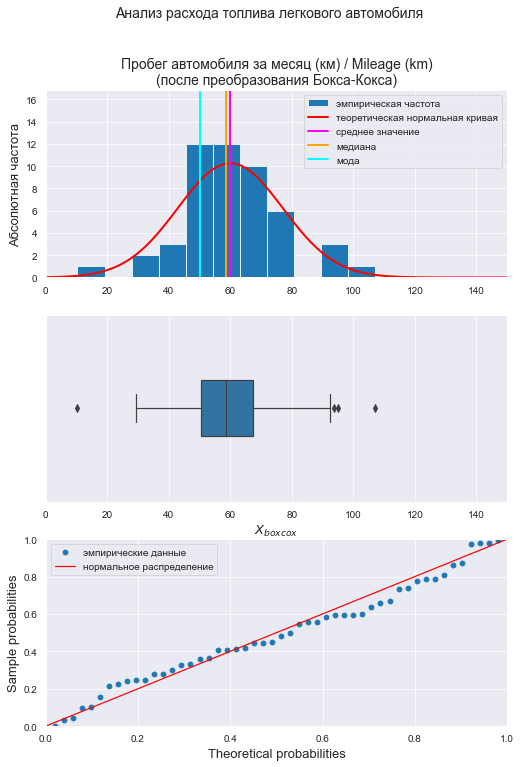

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.1671,True,0.9666,,,gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,0.0653,True,0.3484,0.3740,True,gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.1488,True,3.8103,,,gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,0.6502,0.7360,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,0.0000,False,1.0000,,,not gaussian distribution
5,Lilliefors test,0.9500,0.0500,0.2438,True,0.0995,,,gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,0.0000,False,16.6667,,,not gaussian distribution
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.6615,True,0.4379,,,gaussian distribution


Проверка наличия выбросов переменной X (после преобразования Бокса-Кокса):



,value,mad_calc,mad_table,outlier_conclusion
27,10.3181,2.9089,1.1369,outlier
28,29.3747,1.7931,1.1369,outlier
22,31.3412,1.6779,1.1369,outlier
17,37.8526,1.2966,1.1369,outlier
18,38.6998,1.2470,1.1369,outlier
16,92.3508,1.8945,1.1369,outlier
4,93.7672,1.9775,1.1369,outlier
15,95.0378,2.0519,1.1369,outlier
1,107.0004,2.7524,1.1369,outlier


In [60]:
# визуализация
graph_hist_boxplot_probplot_sns(
    data=X_boxcox,
    data_min=0.0, data_max=150,  
    graph_inclusion='hbp',
    data_label=r'$X_{boxcox}$',
    title_figure=Title_String, title_figure_fontsize=14,
    title_axes=Variable_Name_X1 + "\n(после преобразования Бокса-Кокса)",
    file_name='graph/hist_boxplot_probplot_X_boxcox_sns.png')    

# проверка нормальности распределения
display(norm_distr_check (X_boxcox, p_level=0.95))

# проверка наличия выбросов
print("Проверка наличия выбросов переменной X (после преобразования Бокса-Кокса):\n")
result = detecting_outliers_mad_test(X_boxcox)
mask = (result['outlier_conclusion'] == 'outlier')
display(result[mask])

<u>**Вывод:**</u> большинство статистических тестов ПРИНИМАЮТ гипотезу о нормальном распределении, преобразованные данные можно считать нормально распределенными.

#### <font size="4"> ***Зависимость расхода топлива (Y) от пробега (X1) <br>(после преобразования Бокса-Кокса)***

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


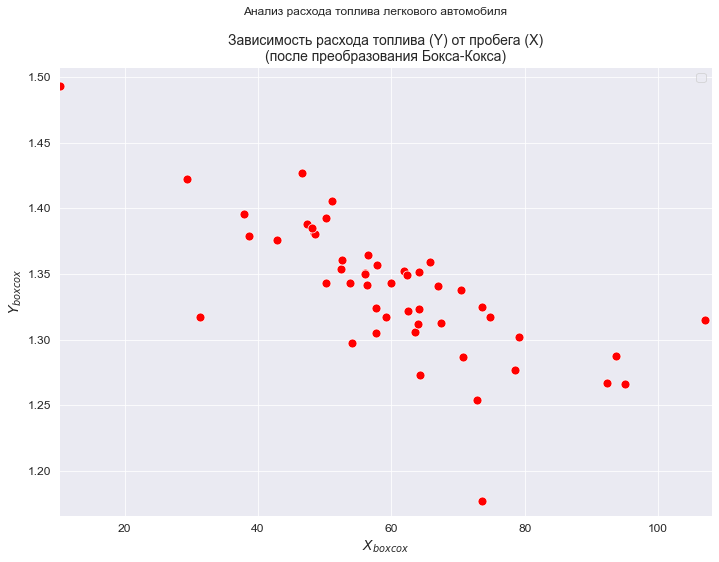

In [61]:
graph_scatterplot_sns(
    X_boxcox, Y_boxcox,
    color='red',
    title_figure=Title_String, title_figure_fontsize=12,
    title_axes='Зависимость расхода топлива (Y) от пробега (X)' + "\n(после преобразования Бокса-Кокса)", title_axes_fontsize=14,
    x_label=r'$X_{boxcox}$',
    y_label=r'$Y_{boxcox}$',
    label_fontsize=14, tick_fontsize=12,
    label_legend='', label_legend_fontsize=12,
    s=80,
    #graph_size=(297/INCH, 210/INCH),
    file_name='graph/scatterplot_X_boxcox_Y_boxcox_sns.png')

Сохраняем данные в DataFrame:

In [62]:
dataset_df_boxcox = pd.DataFrame({
    'X_boxcox': X_boxcox,
    'Y_boxcox': Y_boxcox})
#display(dataset_df_boxcox)

### <center> <font size="6"> <u>***КОРРЕЛЯЦИОННЫЙ АНАЛИЗ***</u>

Корреляционный анализ - это разведка перед построением регрессионной модели.

#### <center> ***До преобразования Бокса-Кокса***  

Так как исходные данные не подчиняются нормальному закону распределения, рассчитаем непараметрические коэффициенты корреляции Кендалла и Спирмена:

In [63]:
display(rank_corr_coef_check(X, Y))

,name,notation,coef_value,p_level,a_level,a_calc,a_calc <= a_level,crit_value,crit_value >= coef_value,significance_check,conf_int_low,conf_int_high,scale
0,Kendall,τ,-0.6043,0.9500,0.0500,0.0000,True,0.1605,False,significance,-0.9166,-0.2919,Evans: strong (0.6 < |r| <= 0.79)
1,Spearman,ρ,-0.7826,0.9500,0.0500,0.0000,True,0.2800,False,significance,-,-,Evans: strong (0.6 < |r| <= 0.79)


<u>**Вывод:**</u> между переменными имеется сильная корреляционная связь.

#### <center> ***После преобразования Бокса-Кокса***  

Так как преобразованные данные подчиняются нормальному закону распределения, можем рассчитать как непараметрические (Кендалла и Спирмена), так и параметрические (Пирсона, корреляционное отношение) коэффициенты корреляции:

In [64]:
display(rank_corr_coef_check(X_boxcox, Y_boxcox))

,name,notation,coef_value,p_level,a_level,a_calc,a_calc <= a_level,crit_value,crit_value >= coef_value,significance_check,conf_int_low,conf_int_high,scale
0,Kendall,τ,-0.6043,0.9500,0.0500,0.0000,True,0.1605,False,significance,-0.9166,-0.2919,Evans: strong (0.6 < |r| <= 0.79)
1,Spearman,ρ,-0.7826,0.9500,0.0500,0.0000,True,0.2800,False,significance,-,-,Evans: strong (0.6 < |r| <= 0.79)


In [65]:
display(corr_coef_check(X_boxcox, Y_boxcox, scale='Evans'))
display(corr_ratio_check(X_boxcox, Y_boxcox, orientation='XY', scale='Evans'))
display(line_corr_sign_check(X_boxcox, Y_boxcox, orientation='XY'))

,notation,coef_value,coef_value_squared,p_level,a_level,t_calc,t_table,t_calc >= t_table,a_calc,a_calc <= a_level,significance_check,conf_int_low,conf_int_high,scale
Correlation coef.,r,-0.7310,0.5343,0.9500,0.0500,7.4213,2.0106,True,0.0000,True,significance,-0.8365,-0.5632,Evans: strong (0.6 < |r| <= 0.79)


,notation,coef_value,coef_value_squared,p_level,a_level,F_calc,F_table,F_calc >= F_table,a_calc,a_calc <= a_level,significance_check,conf_int_low,conf_int_high,scale
Correlation ratio,η,0.7614,0.5797,0.9500,0.0500,9.8849,2.3185,True,0.0000,True,significance,0.7258,1,Evans: strong (0.6 < |η| <= 0.79)


,corr.coef.,corr.ratio.,null hypothesis,p_level,a_level,F_calc,F_table,F_calc >= F_table,a_calc,a_calc <= a_level,null_hypothesis_check,significance_line_corr_check
Significance of linear correlation,-0.7310,0.7614,r² = η²,0.9500,0.0500,0.9286,2.4322,False,0.4719,False,accepted,linear


<u>**Выводы:**</u>
1. Между переменными имеется сильная корреляционная связь (об этом свидетельствуют как непараметрические, так и параметрические показатели).
2. Проверка гипотезы о значимости отличия коэффициента линейной корреляции Пирсона и корреляционного отношения отклоняется, то есть связь между преобразованными данными может быть признана линейной.

### <center> <font size="6"> <u>***РЕГРЕССИОННЫЙ АНАЛИЗ***</u>

### <center> <u>***Модель 1: исходные данные без изменения***</u>

Построим модель на основании исходных данных, взятых без всякого изменения (для сравнения в дальнейшем с другими моделями):

In [66]:
model_linear_ols = smf.ols(formula='Y ~ X', data=dataset_df)
result_linear_ols = model_linear_ols.fit()
print(result_linear_ols.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.419   
Dependent Variable: Y                AIC:                170.5278
Date:               2022-10-26 11:23 BIC:                174.3519
No. Observations:   50               Log-Likelihood:     -83.264 
Df Model:           1                F-statistic:        36.30   
Df Residuals:       48               Prob (F-statistic): 2.30e-07
R-squared:          0.431            Scale:              1.7049  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     11.8945    0.3971  29.9544  0.0000  11.0961  12.6929
X             -0.0022    0.0004  -6.0246  0.0000  -0.0029  -0.0015
-----------------------------------------------------------------
Omnibus:              20.864       Durbin-Watson:          1.697 
Prob(Omnibus):        

<u>**Выводы:**</u>
1. Модель объясняет 43.1% вариации независимой переменной ($R^2 = 0.431$).
2. Делать выводы о значимости коэффициента детерминации и коэффициентов регрессии не будем, так как не выполняется требование о нормальности закона распределения исходных данных.

Формализация модели:

In [67]:
# параметры модели
b0 = result_linear_ols.params['Intercept']
b1 = result_linear_ols.params['X']

# уравнение модели
regr_model_linear_ols_func = lambda x: SLRM_func(x, b0, b1)

График модели:

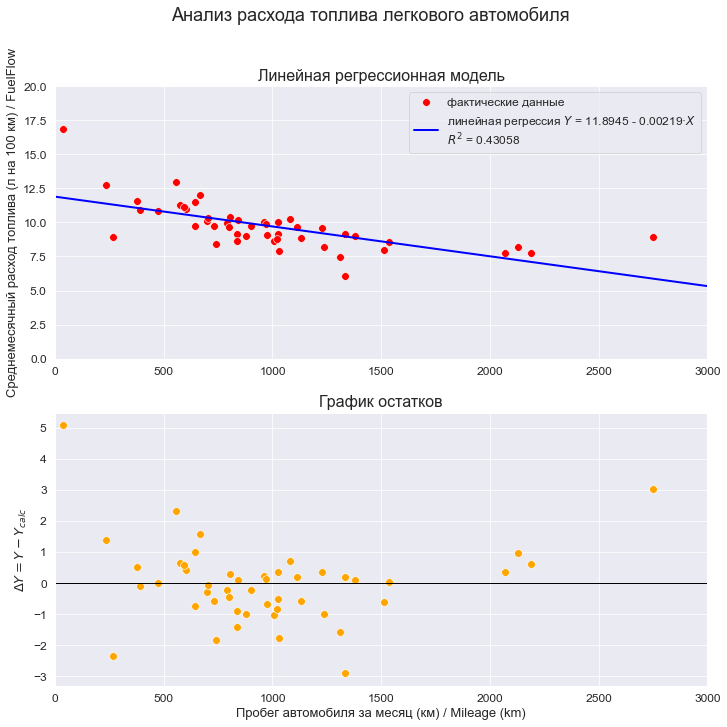

In [68]:
R2 = round(result_linear_ols.rsquared, DecPlace)
legend_equation = f'линейная регрессия ' + r'$Y$' + f' = {b0:.4f} + {b1:.5f}{chr(183)}' + r'$X$' if b1 > 0 else \
                  f'линейная регрессия ' + r'$Y$' + f' = {b0:.4f} - {abs(b1):.5f}{chr(183)}' + r'$X$'

# Пользовательская функция
graph_regression_plot_sns(
    X, Y,
    regression_model=regr_model_linear_ols_func,
    Xmin=X_min_graph, Xmax=X_max_graph,
    Ymin=Y_min_graph, Ymax=Y_max_graph,
    display_residuals=True,
    title_figure=Task_Project,
    title_axes = 'Линейная регрессионная модель',
    x_label=Variable_Name_X1,
    y_label=Variable_Name_Y,
    label_legend_regr_model = legend_equation + '\n' + r'$R^2$' + f' = {R2}',
    s=60,
    file_name='graph/regression_plot_sns_linear_ols.png')

Ошибки аппроксимации модели:

In [69]:
(model_error_metrics, result) = regression_error_metrics(model_linear_ols, model_name='linear_ols')
display(result)

,MSE,RMSE,MAE,MSPE,MAPE
linear_ols,1.6367,1.2793,0.8703,1.751%,9.122%


<u>**Вывод:**</u> модель хорошо аппроксимирует фактические данные.

Проверка нормальности распределения остатков:

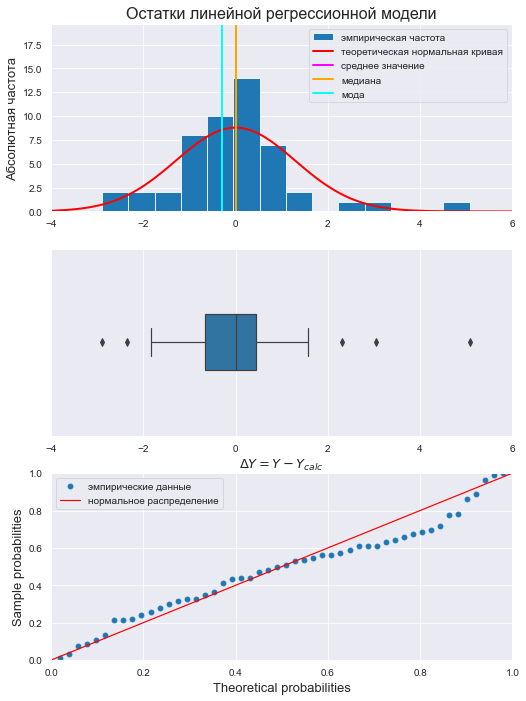

In [70]:
res_Y = np.array(result_linear_ols.resid)

# Пользовательская функция
graph_hist_boxplot_probplot_sns(
    data=res_Y,
    data_min=-4, data_max=6,
    graph_inclusion='hbp',
    data_label=r'$ΔY = Y - Y_{calc}$',
    #title_figure=Task_Project,
    title_axes='Остатки линейной регрессионной модели', title_axes_fontsize=16,
    file_name='graph/residuals_hist_boxplot_probplot_sns.png')    

In [71]:
norm_distr_check(res_Y)

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.0010,False,0.9098,,,not gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,0.0017,False,0.7361,0.3740,False,not gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.0000,False,20.8639,,,not gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,1.1943,0.7360,False,not gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,0.7416,True,0.0933,,,gaussian distribution
5,Lilliefors test,0.9500,0.0500,0.0090,False,0.1466,,,not gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,0.7714,True,0.0671,,,gaussian distribution
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.0016,False,3.1544,,,not gaussian distribution


<u>**Вывод:**</u> большинство статистических тестов ОТВЕРГАЮТ гипотезу о нормальном распределении.

Проверка автокорреляции по критерию Дарбина-Уотсона с помощью пользовательской функции **Durbin_Watson_test** (о применении данного критерия и данной функции я писал в своей статье https://habr.com/ru/post/693402/):

In [72]:
Durbin_Watson_test(res_Y, m=1, p_level=0.95)

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,50,1,0.9500,0.0500,1.6973,0.1514,1.5000,1.5900,DW_table_U < DW_calc < 4 - DW_table_U,H0: r = 0


<u>**Вывод:**</u> гипотеза о наличии автокорреляции ОТВЕРГАЕТСЯ.

### <center> <u>***Модель 2: преобразование Бокса-Кокса***</u>

#### <u>***Прямое преобразование, построение и анализ модели***</u>

Построение модели:

In [73]:
model_linear_boxcox_ols = smf.ols(formula='Y_boxcox ~ X_boxcox', data=dataset_df_boxcox)
result_linear_boxcox_ols = model_linear_boxcox_ols.fit()
print(result_linear_boxcox_ols.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.525    
Dependent Variable: Y_boxcox         AIC:                -190.1564
Date:               2022-10-26 11:23 BIC:                -186.3323
No. Observations:   50               Log-Likelihood:     97.078   
Df Model:           1                F-statistic:        55.08    
Df Residuals:       48               Prob (F-statistic): 1.67e-09 
R-squared:          0.534            Scale:              0.0012555
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       1.4702    0.0185  79.5731  0.0000   1.4330   1.5073
X_boxcox       -0.0022    0.0003  -7.4213  0.0000  -0.0028  -0.0016
------------------------------------------------------------------
Omnibus:               18.577       Durbin-Watson:          1.753 
Prob(Omn

<u>**Выводы:**</u>
1. Модель объясняет 53.4% вариации независимой переменной ($R^2 = 0.534$).
2. Коэффициент детерминации ЗНАЧИМ, т.к. **Prob (F-statistic)** не превышает 0.05.
3. Коэффициенты регрессии значимы, т.к. **P>|t|** не превышает 0.05.

Формализация модели:

In [74]:
# параметры модели
b0_boxcox = result_linear_boxcox_ols.params['Intercept']
b1_boxcox = result_linear_boxcox_ols.params['X_boxcox']

# уравнение модели
regr_model_linear_boxcox_ols_func = lambda x: SLRM_func(x, b0_boxcox, b1_boxcox)

График модели:

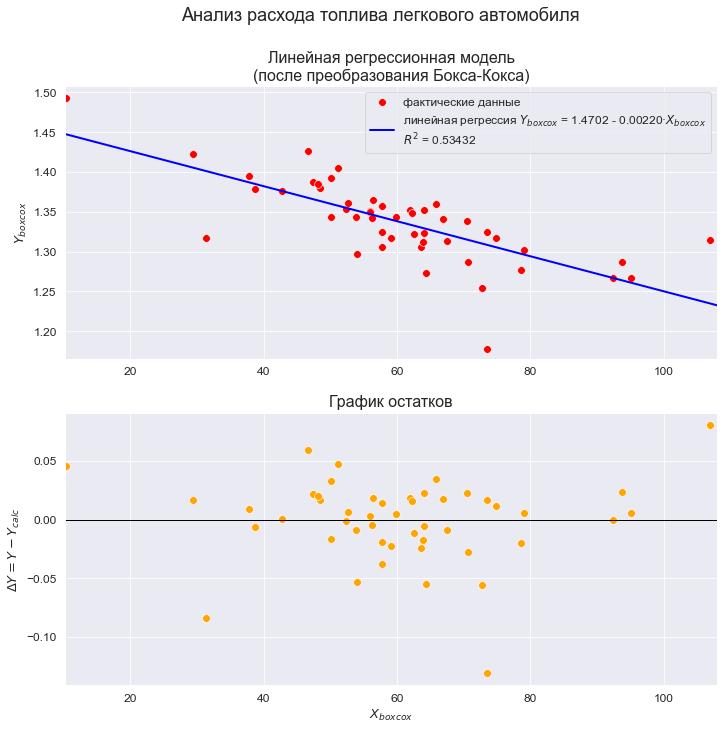

In [75]:
R2 = round(result_linear_boxcox_ols.rsquared, DecPlace)
legend_equation = f'линейная регрессия ' + r'$Y_{boxcox}$' + f' = {b0_boxcox:.4f} + {b1_boxcox:.5f}{chr(183)}' + r'$X_{boxcox}$' if b1_boxcox > 0 else \
                  f'линейная регрессия ' + r'$Y_{boxcox}$' + f' = {b0_boxcox:.4f} - {abs(b1_boxcox):.5f}{chr(183)}' + r'$X_{boxcox}$'

# Пользовательская функция
graph_regression_plot_sns(
    X_boxcox, Y_boxcox,
    regression_model=regr_model_linear_boxcox_ols_func,
    #Xmin=X1_min_graph, Xmax=X1_max_graph,
    #Ymin=Y_min_graph, Ymax=Y_max_graph,
    display_residuals=True,
    title_figure=Task_Project,
    title_axes = 'Линейная регрессионная модель' + "\n(после преобразования Бокса-Кокса)",
    x_label=r'$X_{boxcox}$',
    y_label=r'$Y_{boxcox}$',
    label_legend_regr_model = legend_equation + '\n' + r'$R^2$' + f' = {R2}',
    s=60,
    file_name='graph/regression_plot_sns_linear_boxcox_ols.png')

Ошибки аппроксимации модели:

In [76]:
(model_error_metrics, result) = regression_error_metrics(model_linear_boxcox_ols, model_name='linear_boxcox_ols')
display(result)

,MSE,RMSE,MAE,MSPE,MAPE
linear_boxcox_ols,0.0012,0.0347,0.0245,0.073%,1.854%


<u>**Вывод:**</u> модель хорошо аппроксимирует фактические данные.

Проверка нормальности распределения остатков:

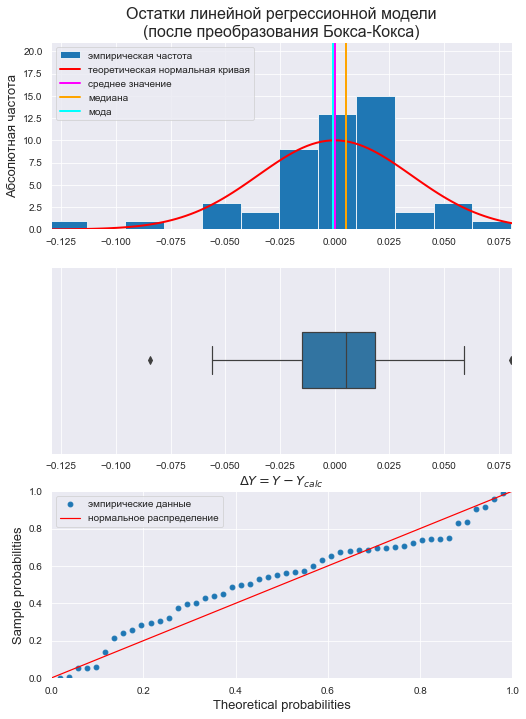

In [77]:
res_Y_boxcox = np.array(result_linear_boxcox_ols.resid)

# Пользовательская функция
graph_hist_boxplot_probplot_sns(
    data=res_Y_boxcox,
    #data_min=-0.15, data_max=0.1,
    graph_inclusion='hbp',
    data_label=r'$ΔY = Y - Y_{calc}$',
    #title_figure=Task_Project,
    title_axes='Остатки линейной регрессионной модели' + "\n(после преобразования Бокса-Кокса)", title_axes_fontsize=16,
    file_name='graph/residuals_hist_boxplot_probplot_sns.png')    

In [78]:
norm_distr_check(res_Y_boxcox)

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.0017,False,0.9161,,,not gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,0.0008,False,0.7829,0.3740,False,not gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.0001,False,18.5773,,,not gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,1.2968,0.7360,False,not gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,0.0000,False,0.4680,,,not gaussian distribution
5,Lilliefors test,0.9500,0.0500,0.0322,False,0.1311,,,not gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,0,False,3.8190,,,not gaussian distribution
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.0018,False,-3.1206,,,not gaussian distribution


<u>**Вывод:**</u> большинство статистических тестов ОТВЕРГАЮТ гипотезу о нормальном распределении.

Проверка автокорреляции:

In [79]:
Durbin_Watson_test(res_Y_boxcox, m=1, p_level=0.95)

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,50,1,0.9500,0.0500,1.7534,0.1233,1.5000,1.5900,DW_table_U < DW_calc < 4 - DW_table_U,H0: r = 0


<u>**Вывод:**</u> гипотеза о наличии автокорреляции ОТВЕРГАЕТСЯ.

#### <u>***Обратное преобразование***</u>

Обратное преобразования для регрессионной модели:

In [80]:
# уравнение модели
inverse_regr_model_linear_boxcox_ols_func = lambda x: inverse_boxcox_SLRM_func(x, b0_boxcox, b1_boxcox, lmax_mle_X, lmax_mle_Y)

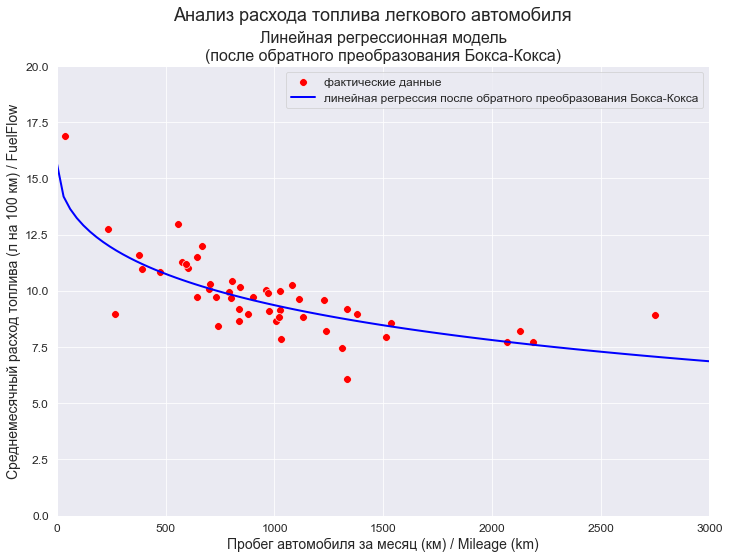

In [81]:
legend_equation = f'линейная регрессия после обратного преобразования Бокса-Кокса'

# Пользовательская функция
graph_regression_plot_sns(
    X, Y,
    regression_model=inverse_regr_model_linear_boxcox_ols_func,
    Xmin=X_min_graph, Xmax=X_max_graph,
    Ymin=Y_min_graph, Ymax=Y_max_graph,
    display_residuals=False,
    title_figure=Task_Project,
    title_axes = 'Линейная регрессионная модель' + "\n(после обратного преобразования Бокса-Кокса)",
    x_label=Variable_Name_X1,
    y_label=Variable_Name_Y,
    label_legend_regr_model = legend_equation,
    s=60,
    #file_name='graph/regression_plot_sns_linear_boxcox_ols.png'
    )

<u>**Вывод:**</u> модель хорошо аппроксимирует фактические данные.

In [82]:
(model_error_metrics_inverse, result_inverse) = regression_error_metrics(Yfact=Y, Ycalc=inverse_regr_model_linear_boxcox_ols_func(X), model_name='linear_boxcox_ols')
display(result_inverse)

,MSE,RMSE,MAE,MSPE,MAPE
linear_boxcox_ols,1.0897,1.0439,0.7533,1.294%,7.889%


<u>**Вывод:**</u> модель хорошо аппроксимирует фактические данные.

### <center> <u>***Модель 3: преобразование Бокса-Кокса с исключением аномальных значений***</u>

При построении предыдущей модели мы не смогли обеспечить нормальность распределения остатков даже с помощью преобразования Бокса-Кокса. Попробуем достичь этого, исключив аномальные значения (выбросы).

#### <u>***Исключение аномальных значений***</u>

Проверка наличия аномальных значений (выбросов) по критерию максимального абсолютного отклонения.

In [83]:
# Переменная X
print("Проверка наличия выбросов переменной X (после преобразования Бокса-Кокса):\n")
result = detecting_outliers_mad_test(X_boxcox)
mask = (result['outlier_conclusion'] == 'outlier')
display(result[mask])

Проверка наличия выбросов переменной X (после преобразования Бокса-Кокса):



,value,mad_calc,mad_table,outlier_conclusion
27,10.3181,2.9089,1.1369,outlier
28,29.3747,1.7931,1.1369,outlier
22,31.3412,1.6779,1.1369,outlier
17,37.8526,1.2966,1.1369,outlier
18,38.6998,1.2470,1.1369,outlier
16,92.3508,1.8945,1.1369,outlier
4,93.7672,1.9775,1.1369,outlier
15,95.0378,2.0519,1.1369,outlier
1,107.0004,2.7524,1.1369,outlier


In [84]:
# Переменная Y
print("Проверка наличия выбросов переменной Y (после преобразования Бокса-Кокса):\n")
result = detecting_outliers_mad_test(Y_boxcox)
mask = (result['outlier_conclusion'] == 'outlier')
display(result[mask])

Проверка наличия выбросов переменной Y (после преобразования Бокса-Кокса):



,value,mad_calc,mad_table,outlier_conclusion
23,1.1775,3.1269,1.1369,outlier
2,1.2540,1.6381,1.1369,outlier
15,1.2666,1.3929,1.1369,outlier
16,1.2671,1.3841,1.1369,outlier
41,1.2733,1.2622,1.1369,outlier
33,1.2773,1.1856,1.1369,outlier
6,1.4053,1.3064,1.1369,outlier
28,1.4222,1.6351,1.1369,outlier
31,1.4268,1.7248,1.1369,outlier
27,1.4928,3.0090,1.1369,outlier


Удаление аномальных значений (выбросов):

In [85]:
mask1 = dataset_df_boxcox['X_boxcox'] < 120
mask2 = dataset_df_boxcox['X_boxcox'] > 20
mask3 = dataset_df_boxcox['Y_boxcox'] < 1.5
mask4 = dataset_df_boxcox['Y_boxcox'] > 1.2
dataset_df_boxcox_clear = dataset_df_boxcox[mask1 & mask2 & mask3 & mask4]
display(dataset_df_boxcox_clear.describe())

X_boxcox_clear = np.array(dataset_df_boxcox_clear['X_boxcox'])
Y_boxcox_clear = np.array(dataset_df_boxcox_clear['Y_boxcox'])

,X_boxcox,Y_boxcox
count,48.0000,48.0000
mean,60.7489,1.3383
std,15.7182,0.0412
min,29.3747,1.2540
25%,50.9187,1.3126
50%,58.4671,1.3424
75%,67.0898,1.3616
max,107.0004,1.4268


#### <u>***Прямое преобразование, построение и анализ модели***</u>

Построение модели:

In [86]:
model_linear_boxcox_clear_ols = smf.ols(formula='Y_boxcox_clear ~ X_boxcox_clear', data=dataset_df_boxcox_clear)
result_linear_boxcox_clear_ols = model_linear_boxcox_clear_ols.fit()
print(result_linear_boxcox_clear_ols.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.493     
Dependent Variable: Y_boxcox_clear   AIC:                -200.6192 
Date:               2022-10-26 11:23 BIC:                -196.8767 
No. Observations:   48               Log-Likelihood:     102.31    
Df Model:           1                F-statistic:        46.62     
Df Residuals:       46               Prob (F-statistic): 1.65e-08  
R-squared:          0.503            Scale:              0.00086031
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept        1.4512    0.0171  85.0227  0.0000   1.4169   1.4856
X_boxcox_clear  -0.0019    0.0003  -6.8276  0.0000  -0.0024  -0.0013
-------------------------------------------------------------------
Omnibus:               2.561         Durbin-Watson:          

<u>**Выводы:**</u>
1. Модель объясняет 50.3% вариации независимой переменной ($R^2 = 0.503$).
2. Коэффициент детерминации ЗНАЧИМ, т.к. **Prob (F-statistic)** не превышает 0.05.
3. Коэффициенты регрессии значимы, т.к. **P>|t|** не превышает 0.05.

Формализация модели:

In [87]:
# параметры модели
b0_boxcox_clear = result_linear_boxcox_clear_ols.params['Intercept']
b1_boxcox_clear = result_linear_boxcox_clear_ols.params['X_boxcox_clear']

# уравнение модели
regr_model_linear_boxcox_clear_ols_func = lambda x: SLRM_func(x, b0_boxcox_clear, b1_boxcox_clear)

График модели:

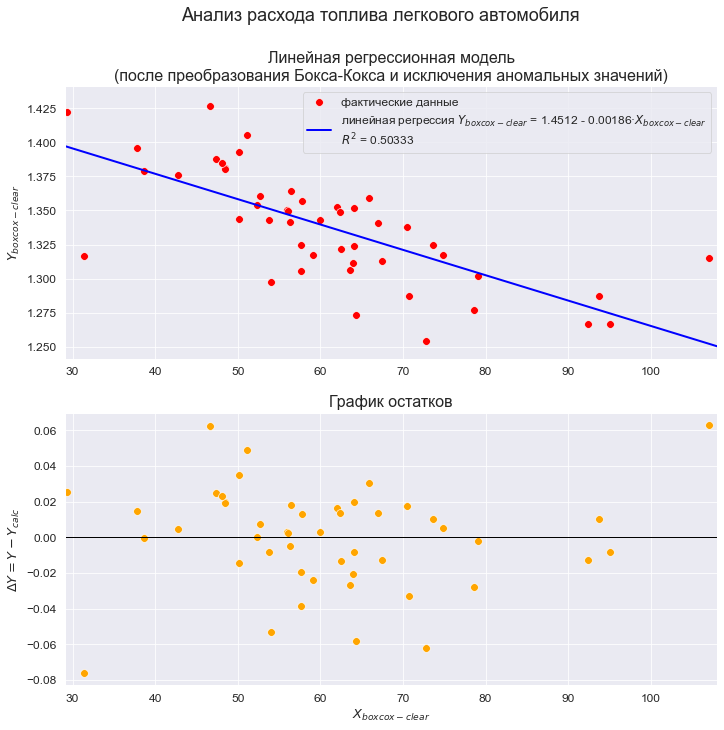

In [88]:
R2 = round(result_linear_boxcox_clear_ols.rsquared, DecPlace)
legend_equation = \
    f'линейная регрессия ' + r'$Y_{boxcox-clear}$' + f' = {b0_boxcox_clear:.4f} + {b1_boxcox_clear:.5f}{chr(183)}' + r'$X_{boxcox-clear}$' if b1_boxcox_clear > 0 else \
    f'линейная регрессия ' + r'$Y_{boxcox-clear}$' + f' = {b0_boxcox_clear:.4f} - {abs(b1_boxcox_clear):.5f}{chr(183)}' + r'$X_{boxcox-clear}$'

# Пользовательская функция
graph_regression_plot_sns(
    X_boxcox_clear, Y_boxcox_clear,
    regression_model=regr_model_linear_boxcox_clear_ols_func,
    #Xmin=X1_min_graph, Xmax=X1_max_graph,
    #Ymin=Y_min_graph, Ymax=Y_max_graph,
    display_residuals=True,
    title_figure=Task_Project,
    title_axes = 'Линейная регрессионная модель' + "\n(после преобразования Бокса-Кокса и исключения аномальных значений)",
    x_label=r'$X_{boxcox-clear}$',
    y_label=r'$Y_{boxcox-clear}$',
    label_legend_regr_model = legend_equation + '\n' + r'$R^2$' + f' = {R2}',
    s=60,
    file_name='graph/regression_plot_sns_linear_boxcox_clear_ols.png')

Ошибки аппроксимации модели:

In [89]:
(model_error_metrics, result) = regression_error_metrics(model_linear_boxcox_clear_ols, model_name='linear_boxcox_clear_ols')
display(result)

,MSE,RMSE,MAE,MSPE,MAPE
linear_boxcox_clear_ols,0.0008,0.0287,0.0219,0.047%,1.643%


<u>**Вывод:**</u> модель хорошо аппроксимирует фактические данные.

Проверка нормальности распределения остатков:

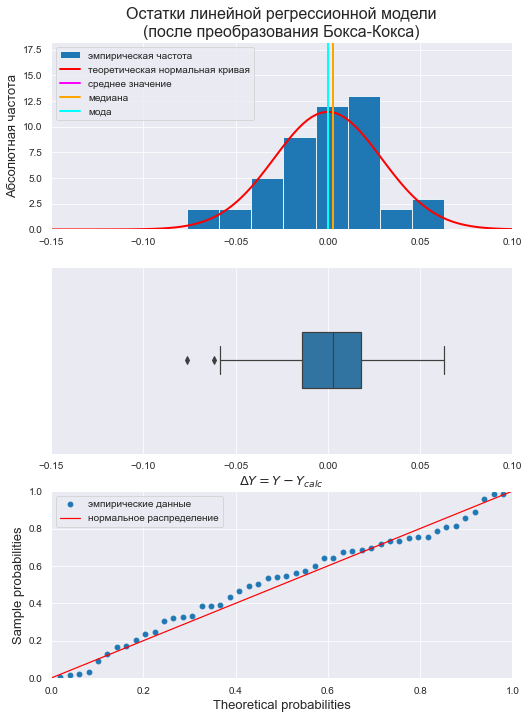

In [90]:
res_Y_boxcox_clear = np.array(result_linear_boxcox_clear_ols.resid)

# Пользовательская функция
graph_hist_boxplot_probplot_sns(
    data=res_Y_boxcox_clear,
    data_min=-0.15, data_max=0.1,
    graph_inclusion='hbp',
    data_label=r'$ΔY = Y - Y_{calc}$',
    #title_figure=Task_Project,
    title_axes='Остатки линейной регрессионной модели' + "\n(после преобразования Бокса-Кокса)", title_axes_fontsize=16,
    file_name='graph/residuals_hist_boxplot_probplot_sns.png')    

In [91]:
norm_distr_check(res_Y_boxcox_clear)

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.2621,True,0.9704,,,gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,0.1270,True,0.2582,0.3738,True,gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.2779,True,2.5609,,,gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,0.5385,0.7340,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,-,-,-,,,count less than 50
5,Lilliefors test,0.9500,0.0500,0.5232,True,0.0847,,,gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,0,False,3.7049,,,not gaussian distribution
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.2446,True,-1.1636,,,gaussian distribution


<u>**Вывод:**</u> большинство статистических тестов ПРИНИМАЮТ гипотезу о нормальном распределении.

Проверка адекватности модели:

In [92]:
regression_model_adequacy_check(result_linear_boxcox_clear_ols, p_level=0.95, model_name='linear_ols')

,SST,SSE,dfT,dfE,MST,MSE,p_level,a_level,F_calc,F_table,F_calc >= F_table,a_calc,a_calc <= a_level,adequacy_check
linear_ols,0.0797,0.0396,47,46,0.0017,0.0009,0.9500,0.0500,1.9706,1.6293,True,0.0115,True,adequacy


<u>**Вывод:**</u> регрессионная модель АДЕКВАТНА.

Проверка гетероскедастичности:

In [93]:
Goldfeld_Quandt_test_df = Goldfeld_Quandt_test(result_linear_boxcox_clear_ols, p_level=0.95, model_name='linear_boxcox_clear_ols')
Breush_Pagan_test_df = Breush_Pagan_test(result_linear_boxcox_clear_ols, p_level=0.95, model_name='linear_boxcox_clear_ols')
White_test_df = White_test(result_linear_boxcox_clear_ols, p_level=0.95, model_name='linear_boxcox_clear_ols')

heteroscedasticity_tests_df = pd.concat([Breush_Pagan_test_df, White_test_df, Goldfeld_Quandt_test_df])
display(heteroscedasticity_tests_df)

,test,p_level,a_level,Lagrange_multiplier_statistic,p_calc_LM,p_calc_LM < a_level,F_statistic,p_calc,p_calc < a_level,heteroscedasticity_check
linear_boxcox_clear_ols,Breush-Pagan test,0.9500,0.0500,0.1179,0.7313,False,0.1133,0.7380,False,not heteroscedasticity
linear_boxcox_clear_ols,White test,0.9500,0.0500,5.9502,0.0510,False,3.1838,0.0509,False,not heteroscedasticity
linear_boxcox_clear_ols,Goldfeld–Quandt test,0.9500,0.0500,NaN,NaN,NaN,0.5717,0.9012,False,not heteroscedasticity


<u>**Вывод:**</u> гипотеза о наличии гетероскедастичности ОТВЕРГАЕТСЯ.

Проверка автокорреляции:

In [94]:
Durbin_Watson_test(res_Y_boxcox_clear, m=1, p_level=0.95)

,n,m,p_level,a_level,DW_calc,ρ,DW_table_L,DW_table_U,comparison of calculated and critical values,conclusion
Durbin-Watson_test,48,1,0.9500,0.0500,2.0677,-0.0338,1.4920,1.5820,DW_table_U < DW_calc < 4 - DW_table_U,H0: r = 0


<u>**Вывод:**</u> гипотеза о наличии автокорреляции ОТВЕРГАЕТСЯ.

#### <u>***Обратное преобразование***</u>

In [95]:
# уравнение модели
inverse_regr_model_linear_boxcox_clear_ols_func = lambda x: inverse_boxcox_SLRM_func(x, b0_boxcox_clear, b1_boxcox_clear, lmax_mle_X, lmax_mle_Y)

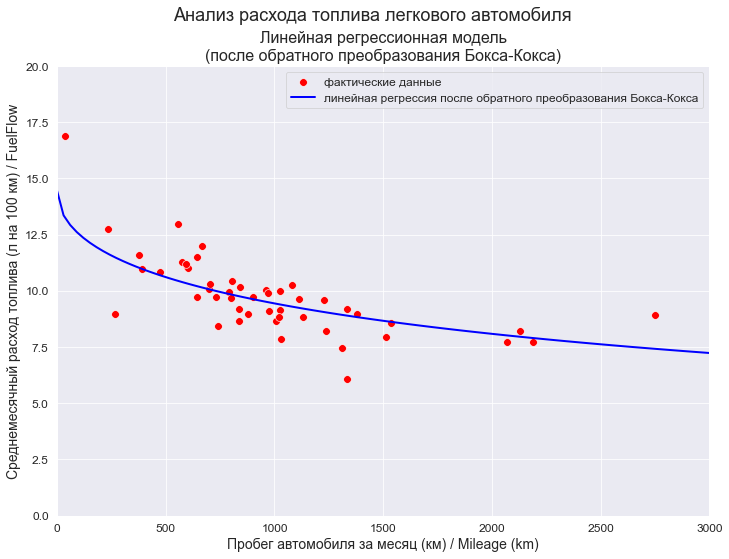

In [96]:
legend_equation = f'линейная регрессия после обратного преобразования Бокса-Кокса'

# Пользовательская функция
graph_regression_plot_sns(
    X, Y,
    regression_model=inverse_regr_model_linear_boxcox_clear_ols_func,
    Xmin=X_min_graph, Xmax=X_max_graph,
    Ymin=Y_min_graph, Ymax=Y_max_graph,
    display_residuals=False,
    title_figure=Task_Project,
    title_axes = 'Линейная регрессионная модель' + "\n(после обратного преобразования Бокса-Кокса)",
    x_label=Variable_Name_X1,
    y_label=Variable_Name_Y,
    label_legend_regr_model = legend_equation,
    s=60,
    #file_name='graph/regression_plot_sns_linear_boxcox_ols.png'
    )

Ошибки аппроксимации модели:

In [97]:
(model_error_metrics, result) = regression_error_metrics(Yfact=Y, Ycalc=inverse_regr_model_linear_boxcox_clear_ols_func(X), model_name='inverse_linear_boxcox_clear_ols')
display(result)

,MSE,RMSE,MAE,MSPE,MAPE
inverse_linear_boxcox_clear_ols,1.2061,1.0982,0.7810,1.359%,8.109%


<u>**Вывод:**</u> модель хорошо аппроксимирует фактические данные.

#### <u>***Прогнозирование***</u>

Для получения прогнозных значений и построения графика прогноза применим пользовательскую функцию **graph_regression_pair_predict_plot_sns** (об этой функции я писал ранее в своей статье https://habr.com/ru/post/690414/).

Вначале применим указанную функцию к преобразованным по Боксу-Коксу данным:

Укажем границы интервала прогнозирования:

In [98]:
# справочно: установленные границы для графиков
#(X_min_graph, X_max_graph) = (0, 3000)
#(Y_min_graph, Y_max_graph) = (0, 20)

# границы интервала прогнозирования по X
X_forecast_min = X_min_graph
X_forecast_max = X_max_graph
print(f'X_forecast = [{X_forecast_min}, {X_forecast_max}]')

# границы интервала прогнозирования по X_boxcox
X_forecast_min_boxcox = boxcox_func(X_forecast_min, lmax_mle_X)
X_forecast_max_boxcox = boxcox_func(X_forecast_max, lmax_mle_X)
print(f'X_forecast_boxcox = [{X_forecast_min_boxcox}, {X_forecast_max_boxcox}]')

# границы для отображения прогнозируемой величины Y_boxcox на графике
Y_forecast_min_boxcox_clear = np.min(Y_boxcox_clear)*0.99
Y_forecast_max_boxcox_clear = np.max(Y_boxcox_clear)*1.01
print(f'Y_forecast_boxcox_clear = [{Y_forecast_min_boxcox_clear}, {Y_forecast_max_boxcox_clear}]')

X_forecast = [0, 3000]
X_forecast_boxcox = [-1.974689012685597, 111.87810677602485]
Y_forecast_boxcox_clear = [1.2414770110016238, 1.4411136650656104]


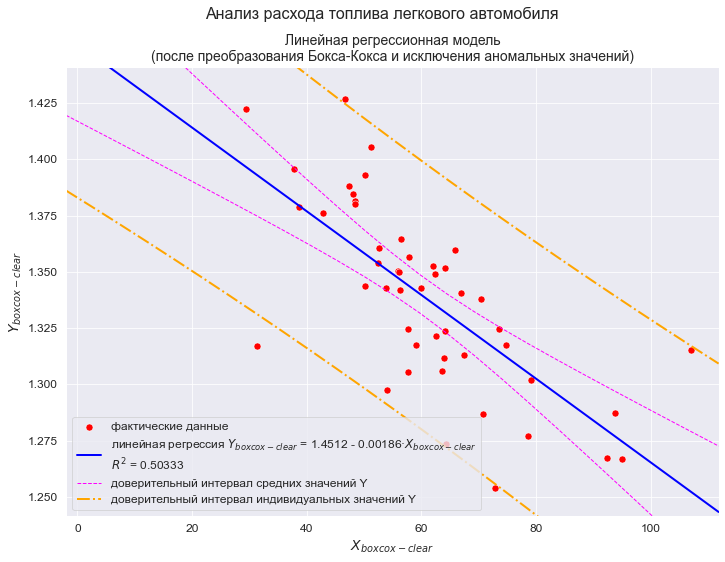

In [99]:
R2 = round(result_linear_boxcox_clear_ols.rsquared, DecPlace)
legend_equation = \
    f'линейная регрессия ' + r'$Y_{boxcox-clear}$' + f' = {b0_boxcox_clear:.4f} + {b1_boxcox_clear:.5f}{chr(183)}' + r'$X_{boxcox-clear}$' if b1_boxcox_clear > 0 else \
    f'линейная регрессия ' + r'$Y_{boxcox-clear}$' + f' = {b0_boxcox_clear:.4f} - {abs(b1_boxcox_clear):.5f}{chr(183)}' + r'$X_{boxcox-clear}$'

forecast_boxcox_clear_df = graph_regression_pair_predict_plot_sns(
    model_fit=result_linear_boxcox_clear_ols,
    regression_model_in=regr_model_linear_boxcox_clear_ols_func,
    Xmin=X_forecast_min_boxcox, Xmax=X_forecast_max_boxcox, Nx=25,
    Ymin_graph=Y_forecast_min_boxcox_clear, Ymax_graph=Y_forecast_max_boxcox_clear,
    title_figure=Task_Project, title_figure_fontsize=16,
    title_axes = 'Линейная регрессионная модель' + "\n(после преобразования Бокса-Кокса и исключения аномальных значений)", title_axes_fontsize=14,
    x_label=r'$X_{boxcox-clear}$',
    y_label=r'$Y_{boxcox-clear}$',
    label_legend_regr_model = legend_equation + '\n' + r'$R^2$' + f' = {R2}',
    s=50,
    result_output=True,
    file_name='graph/regression_plot_lin.png')

Таблица расчета прогнозных данных после преобразования Бокса-Кокса - включает следующие столбцы:
* **x_calc** - значения переменной **X**, преобразованные по Боксу-Коксу;
* **y_calc** - расчетные значения переменной **Y** (рассчитаны на основании модели, построенной на данных после преобразования Бокса-Кокса);
* **y_calc_mean_ci_low**, **y_calc_mean_ci_upp** - границы доверительного интервала средних значений переменной **Y**;
* **y_calc_predict_ci_low**, **y_calc_predict_ci_upp** - границы доверительного интервала индивидуальных значений переменной **Y**.

In [100]:
display(forecast_boxcox_clear_df)

,x_calc,y_calc,y_calc_mean_ci_low,y_calc_mean_ci_upp,y_calc_predict_ci_low,y_calc_predict_ci_upp
0,-1.9747,1.4549,1.4195,1.4903,1.3861,1.5237
1,2.7692,1.4461,1.4132,1.4790,1.3785,1.5137
2,7.5130,1.4373,1.4069,1.4677,1.3709,1.5037
3,12.2569,1.4284,1.4005,1.4564,1.3631,1.4938
4,17.0008,1.4196,1.3942,1.4451,1.3553,1.4839
5,21.7446,1.4108,1.3878,1.4338,1.3475,1.4742
6,26.4885,1.4020,1.3814,1.4226,1.3395,1.4645
7,31.2324,1.3932,1.3749,1.4115,1.3314,1.4550
8,35.9762,1.3844,1.3683,1.4004,1.3232,1.4455
9,40.7201,1.3756,1.3617,1.3894,1.3149,1.4362


Теперь на основании полученных табличных данных выполним обратное преобразование Бокса-Кокса и построим график прогноза уже для непреобразованных данных:

In [101]:
# создаем новую таблицу расчета прогнозных данных - после обратного преобразования Боса-Кокса
inverse_forecast_boxcox_clear_df = forecast_boxcox_clear_df.copy()

# обратное преобразование значений переменной X
inverse_forecast_boxcox_clear_df['x_calc'] = inverse_boxcox_func(inverse_forecast_boxcox_clear_df['x_calc'].values, lmax_mle_X)

# обратное преобразование значений переменной Y и границ доверительных интервалов
for col in inverse_forecast_boxcox_clear_df.columns[1:]:
    inverse_forecast_boxcox_clear_df[col] = inverse_boxcox_func(inverse_forecast_boxcox_clear_df[col].values, lmax_mle_Y)
    
display(inverse_forecast_boxcox_clear_df)

,x_calc,y_calc,y_calc_mean_ci_low,y_calc_mean_ci_upp,y_calc_predict_ci_low,y_calc_predict_ci_upp
0,0.0000,14.4615,12.6417,16.7089,11.2231,19.3548
1,5.6446,13.9730,12.3544,15.9352,10.9359,18.4943
2,22.1857,13.5090,12.0763,15.2153,10.6569,17.6965
3,49.4082,13.0679,11.8068,14.5445,10.3857,16.9555
4,87.1996,12.6483,11.5454,13.9186,10.1220,16.2663
5,135.4820,12.2487,11.2915,13.3342,9.8653,15.6245
6,194.1959,11.8679,11.0443,12.7879,9.6155,15.0258
7,263.2929,11.5047,10.8032,12.2774,9.3722,14.4668
8,342.7324,11.1580,10.5671,11.8004,9.1352,13.9441
9,432.4795,10.8270,10.3346,11.3557,8.9043,13.4548


Построим график:

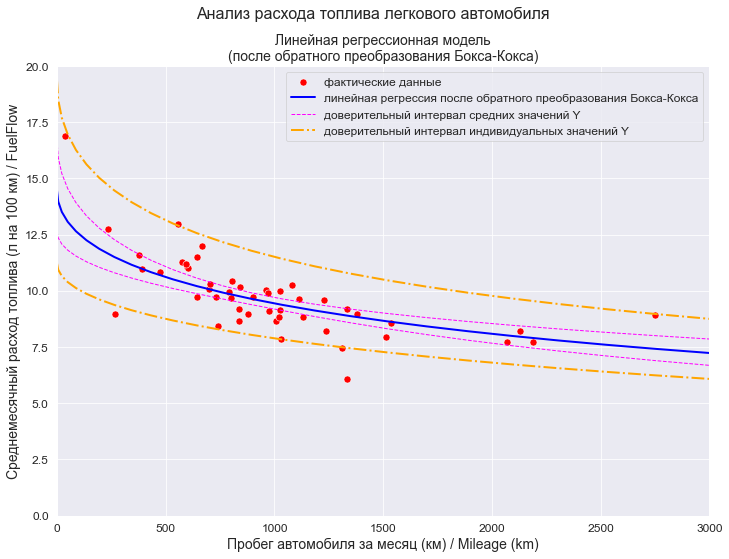

In [102]:
legend_equation = f'линейная регрессия после обратного преобразования Бокса-Кокса'

graph_size=(297/INCH, 210/INCH)
fig, axes = plt.subplots(figsize=graph_size)
title_figure=Task_Project
title_figure_fontsize=16
fig.suptitle(title_figure, fontsize = title_figure_fontsize)
title_axes = 'Линейная регрессионная модель' + "\n(после обратного преобразования Бокса-Кокса)"
title_axes_fontsize=14
axes.set_title(title_axes, fontsize = title_axes_fontsize)

# фактические данные
sns.scatterplot(
    x=X, y=Y,
    label='фактические данные',
    s=50,
    color='red',
    ax=axes)

x_calc = inverse_forecast_boxcox_clear_df['x_calc']
y_calc = inverse_forecast_boxcox_clear_df['y_calc']


# график регрессионной модели
sns.lineplot(
    x=x_calc, y=y_calc,
    color='blue',
    linewidth=2,
    legend=True,
    label=legend_equation,
    ax=axes)

# доверительный интервал средних значений переменной Y
Mean_ci_low = inverse_forecast_boxcox_clear_df['y_calc_mean_ci_low']
plt.plot(
    x_calc, Mean_ci_low,
    color='magenta', linestyle='--', linewidth=1,
    label='доверительный интервал средних значений Y')
    
Mean_ci_upp = inverse_forecast_boxcox_clear_df['y_calc_mean_ci_upp']
plt.plot(
    x_calc, Mean_ci_upp,
    color='magenta', linestyle='--', linewidth=1)

# доверительный интервал индивидуальных значений переменной Y
Predict_ci_low = inverse_forecast_boxcox_clear_df['y_calc_predict_ci_low']
plt.plot(
    x_calc, Predict_ci_low,
    color='orange', linestyle='-.', linewidth=2,
    label='доверительный интервал индивидуальных значений Y')
    
Predict_ci_upp = inverse_forecast_boxcox_clear_df['y_calc_predict_ci_upp']
plt.plot(
    x_calc, Predict_ci_upp,
    color='orange', linestyle='-.', linewidth=2)


axes.set_xlabel(Variable_Name_X1, fontsize = 14)
axes.set_ylabel(Variable_Name_Y, fontsize = 14)
#axes.tick_params(labelsize = 12)
axes.set_xlim(X_forecast_min, X_forecast_max)
axes.set_ylim(Y_min_graph, Y_max_graph)
axes.legend(prop={'size': 12})
plt.show()

Ну вот,собственно говоря, на этом этапе задача решена - получены табличные значения и график прогноза.

### <center> <u>***Модель 4: прочие преобразования***</u>

#### <u>***Постановка задачи***</u>

Итак, на предыдущем этапе мы получили регрессионную модель, которая удовлетворяет основным требованиям: исходные данные преобразованы к нормально распределенным, остатки модели также нормально распределены, модель хорошо аппроксимирует фактические данные, адекватна и значима, гетероскедастичность отсутствует. Казалось бы  - чего еще желать?

Однако, чтобы добиться этого, нам пришлось исключить из исходных данных аномальные значения (выбросы). Само по себе это, конечно, не трагедия, однако объем выборки уменьшился, а ,как известно, любое значение несет в себе ценную статистическую информацию.

В связи с этим возник вопрос - если уж преобразование Бокса-Кокса не дает нужного эффекта, можно ли подобрать такое преобразование, которое позволило бы нам получить регрессионную модель, пригодную для использования, без исключения из выборки значений?

Преобразование будем подбирать таким образом, чтобы обеспечить одновременное выполнение следующих условий:
* распределение преобразованных переменных **X_transform** и **Y_transform** должно быть нормальным;
* регрессионная модуль, построенная на основе преобразованных переменных, должна быть адекватной и значимой;
* распределение остатков регрессионной модели должно быть нормальным.

На возможную гетероскедастичность закроем глаза - взвешенный МНК нам в помощь.

#### <u>***Выбор критерия***</u>

Прежде всего определимся с критерием, по которому будем оценивать нормальность распределения. Число критериев нормальности весьма велико: в справочнике Кобзаря А.И. приводится 21 критерий [1, глава 3.2], в монографии Лемешко Б.Ю. [4] проанализировано уже 50 критериев. При этом исследователи ранжируют критерии в зависимости от особенностей исходных данных: одни и те же критерии при разной асимметрии и эксцессе могут имеют различную мощность.<br>

Стандартный статистический инструментарий **python** (библиотека **scipy**) предлагает нам следующие критерии нормальности:
* Шапиро-Уилка
* Д'Агостино
* Андерсона-Дарлинга
* Колмогорова-Смирнова
* Лиллиефорса
* Крамера-Мизеса-Смирнова (омега-квадрат)
* Пирсона (хи-квадрат)
* Харке-Бера
* асимметрии и эксцесса.
  
Дополнительно мы еще можем добавить к ним критерий Эппса-Палли (об этом я писал ранее в своей статье https://habr.com/ru/post/685582/).

Наши исходные данные имеют следующие свойства:
* переменная **X**: значительная правосторонняя асимметрия (**As = 1.2937**), островершинное распределение (**Es = 5.3008**);
* переменная **Y**: значительная правосторонняя асимметрия (**As = 1.4066**), островершинное распределение (**Es = 7.5286**).

Кобзарь А.И. в этом случае рекомендует [1, с.278] следующие критерии из доступных нам (по степени убывания мощности):
* Шапиро-Уилка
* Д'Агостино
* хи-квадрат
* Андерсона-Дарлинга
* Колмогорова-Смирнова
* Крамера-фон Мизеса.

Рекомендации Лемешко Б.Ю. [4, с.369] дифференцированы в зависимости от вида конкурирующей гипотезы; в качестве таких гипотез рассматриваются различные виды распределений, отличных от нормального:
* конкурирующая гипотеза **H1**: обобщенное нормальное распределение (плосковершинное);
* конкурирующая гипотеза **H2**: логистическое распределение (наиболее близкое к нормальному);
* конкурирующая гипотеза **H3**: распределение Лапласа (островершинное).

В нашем случае конкурирующей гипотезой будет **H3**. Для таких распределений рекомендуется использовать следующие критерии из доступных нам (по степени убывания мощности):
* Харке-Бера
* Д'Агостино
* Эппса-Палли
* Андерсона-Дарлинга
* Крамера-фон Мизеса
* Шапиро-Уилка
* Колмогорова
* хи-квадрат<br>

Как видим, рекомендации противоречивые. При этом в справочнике [Кобзаря А.И.] автор ссылается на исследование Шапиро, Уилка и Чена 1968 г. (номер 243 в списке источников), а ранжирование Лемешко Б.Ю. основано на исследованиях, выполненных гораздо позже (с 1990-х гг. по наше время) методом статистического моделирования.

Критерий Харке-Бера, который в рейтинге Лемешко Б.Ю. стоит на первом месте, является асимптотическим, расчетное значение имеет распределение хи-квадрат, поэтому данный критерий рекомендуют применять только для больших выборок (см. https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test). В нашем случае очевидно, что он не подходит.

Остановимся на следующих критериях: **Д'Агостино**, **Эппса-Палли**, ну и включим в список старый добрый критерий **Шапиро-Уилка**.

#### <u>***Выбор вида преобразования***</u>

Вот это самое интересное. Вариантов может быть немало, но мы остановимся на рекомендациях, данных в работе [14, с.40] для распределений с правосторонней асимметрией рекомендуется степенное преобразование с коэффициентом **a > 1**.

#### <u>***Вычисления***</u>

1. Определим такие интервалы интервалы значений параметров степенного преобразования $\alpha_x \in [\alpha_{x_{min}}, \alpha_{x_{max}}]$ и $\alpha_y \in [\alpha_{y_{min}}, \alpha_{y_{max}}]$, внутри которых преобразованные переменные $\tilde{x} = x^{\alpha_x}$ и $\tilde{y} = y^{\alpha_y}$ подчиняются нормальному закону распределения (т.е. расчетный уровень значимости превышает 0.05), в результате получим некую прямоугольную область в координатах $\alpha_x, \alpha_y$:

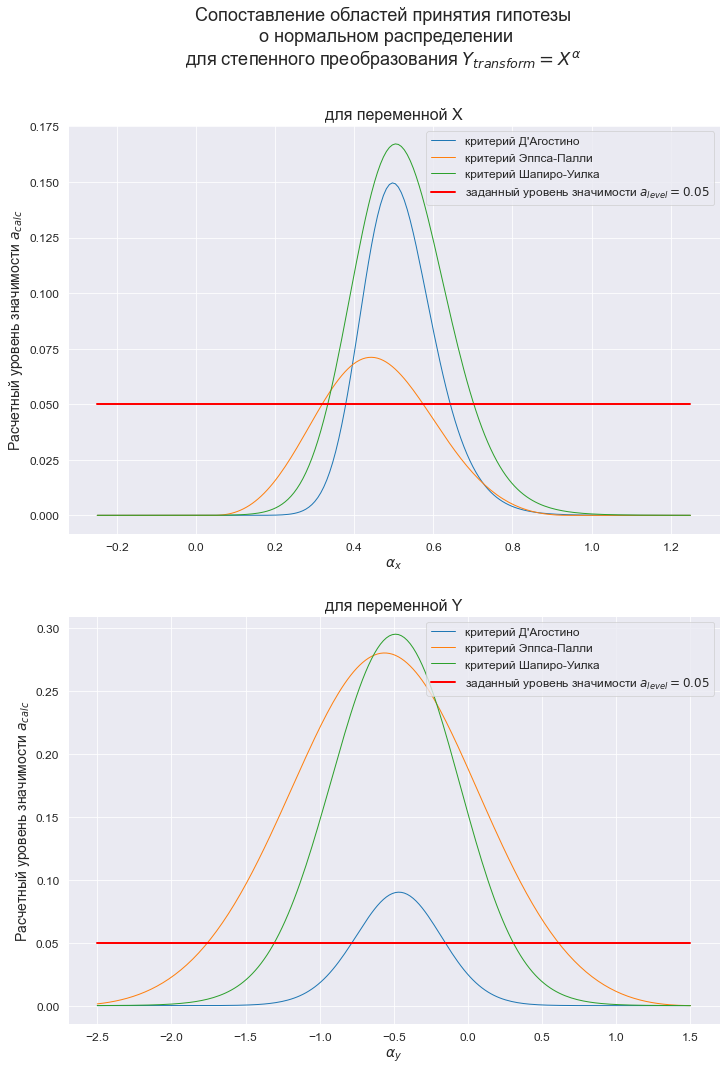

In [103]:
X = np.array(data_df['Mileage'])
Y = np.array(data_df['FuelFlow'])

# степенное преобразование
alpha_count = 200
alpha_list_x = np.linspace(-0.25, 1.25, alpha_count)
alpha_list_y = np.linspace(-2.5, 1.5, alpha_count)
# критерий Д'Агостино
a_calc_K2_list_x = [sci.stats.normaltest(X**alpha).pvalue for alpha in alpha_list_x]
a_calc_K2_list_y = [sci.stats.normaltest(Y**alpha).pvalue for alpha in alpha_list_y]
# критерий Эппса-Палли
a_calc_EP_list_x = [Epps_Pulley_test(X**alpha)['a_calc'].values[0] for alpha in alpha_list_x]
a_calc_EP_list_y = [Epps_Pulley_test(Y**alpha)['a_calc'].values[0] for alpha in alpha_list_y]
# критерий Шапиро-Уилка
a_calc_SW_list_x = [sci.stats.shapiro(X**alpha).pvalue for alpha in alpha_list_x]
a_calc_SW_list_y = [sci.stats.shapiro(Y**alpha).pvalue for alpha in alpha_list_y]
# уровень значимости
a_level_list = np.linspace(0.05, 0.05, alpha_count)

# график
fig = plt.figure(figsize=(297/INCH, 420/INCH))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

fig.suptitle(f'Сопоставление областей принятия гипотезы\n о нормальном распределении\n' +
             'для степенного преобразования ' + r'$Y_{transform} = X^{\alpha}$', fontsize = 18)
ax1.set_title("для переменной X", fontsize = 16)
ax2.set_title("для переменной Y", fontsize = 16)

legend_text = [
    "критерий Д'Агостино",
    'критерий Эппса-Палли',
    'критерий Шапиро-Уилка',
    'заданный уровень значимости ' + r'$a_{level}=0.05$']

ax1.plot(alpha_list_x, a_calc_K2_list_x, linestyle = "-", linewidth = 1)
ax1.plot(alpha_list_x, a_calc_EP_list_x, linestyle = "-", linewidth = 1)
ax1.plot(alpha_list_x, a_calc_SW_list_x, linestyle = "-", linewidth = 1)
ax1.plot(alpha_list_x, a_level_list, linestyle = "-", linewidth = 2, color='red')
ax1.legend(legend_text, fontsize = 12)
ax1.set_xlabel(r'$\alpha_{x}$')
ax1.set_ylabel(r'Расчетный уровень значимости $a_{calc}$')

ax2.plot(alpha_list_y, a_calc_K2_list_y, linestyle = "-", linewidth = 1)
ax2.plot(alpha_list_y, a_calc_EP_list_y, linestyle = "-", linewidth = 1)
ax2.plot(alpha_list_y, a_calc_SW_list_y, linestyle = "-", linewidth = 1)
ax2.plot(alpha_list_y, a_level_list, linestyle = "-", linewidth = 2, color='red')
ax2.legend(legend_text, fontsize = 12)
ax2.set_xlabel(r'$\alpha_{y}$')
ax2.set_ylabel(r'Расчетный уровень значимости $a_{calc}$')

plt.show()

Для точного определения границ этой области воспользуемся функциями интерполяции библиотеки scipy:
* https://docs.scipy.org/doc/scipy/tutorial/interpolate.html#
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.sproot.html#scipy.interpolate.sproot
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

Интерполяция кубическими сплайнами и определение корней сплайнов (для переменной X):

In [104]:
# корни кривой для критерия Д'Агостино
splrep_a_calc_K2_x = sci.interpolate.splrep(alpha_list_x, np.array(a_calc_K2_list_x) - a_level, s=0)    # интерполяция
root_interp_a_calc_K2_x = sci.interpolate.sproot(splrep_a_calc_K2_x)    # нахождение корней сплайна
print(f"Корни кривой для критерия Д'Агостино: {root_interp_a_calc_K2_x}")
interp_a_calc_K2_x = sci.interpolate.interp1d(alpha_list_x, a_calc_K2_list_x, kind='cubic')    # проверка корней
print(f'Проверка корней: {interp_a_calc_K2_x(root_interp_a_calc_K2_x)}\n')

# корни кривой для критерия Эппса-Палли
splrep_a_calc_EP_x = sci.interpolate.splrep(alpha_list_x, np.array(a_calc_EP_list_x) - a_level, s=0)    # интерполяция
root_interp_a_calc_EP_x = sci.interpolate.sproot(splrep_a_calc_EP_x)    # нахождение корней сплайна
print(f"Корни кривой для критерия Эппса-Палли: {root_interp_a_calc_EP_x}")
interp_a_calc_EP_x = sci.interpolate.interp1d(alpha_list_x, a_calc_EP_list_x, kind='cubic')    # проверка корней
print(f'Проверка корней: {interp_a_calc_EP_x(root_interp_a_calc_EP_x)}\n')

# корни кривой для критерия Шапиро-Уилка
splrep_a_calc_SW_x = sci.interpolate.splrep(alpha_list_x, np.array(a_calc_SW_list_x) - a_level, s=0)    # интерполяция
root_interp_a_calc_SW_x = sci.interpolate.sproot(splrep_a_calc_SW_x)    # нахождение корней сплайна
print(f"Корни кривой для критерия Шапиро-Уилка: {root_interp_a_calc_SW_x}")
interp_a_calc_SW_x = sci.interpolate.interp1d(alpha_list_x, a_calc_SW_list_x, kind='cubic')    # проверка корней
print(f'Проверка корней: {interp_a_calc_SW_x(root_interp_a_calc_SW_x)}\n')

# определяем область допустимых значений для параметра степенного преобразования
alpha_x_min = max(
    root_interp_a_calc_K2_x[0],
    root_interp_a_calc_EP_x[0],
    root_interp_a_calc_SW_x[0]
    )
alpha_x_max = min(
    root_interp_a_calc_K2_x[1],
    root_interp_a_calc_EP_x[1],
    root_interp_a_calc_SW_x[1]
    )
print(f'Область допустимых значений для параметра степенного преобразования: {[alpha_x_min, alpha_x_max]}')

Корни кривой для критерия Д'Агостино: [0.3783 0.6428]
Проверка корней: [0.0500 0.0500]

Корни кривой для критерия Эппса-Палли: [0.3185 0.5742]
Проверка корней: [0.0500 0.0500]

Корни кривой для критерия Шапиро-Уилка: [0.3328 0.7022]
Проверка корней: [0.0500 0.0500]

Область допустимых значений для параметра степенного преобразования: [0.378305704394651, 0.5741996960905467]


Интерполяция кубическими сплайнами и определение корней сплайнов (для переменной Y):

In [105]:
# корни кривой для критерия Д'Агостино
splrep_a_calc_K2_y = sci.interpolate.splrep(alpha_list_y, np.array(a_calc_K2_list_y) - a_level, s=0)    # интерполяция
root_interp_a_calc_K2_y = sci.interpolate.sproot(splrep_a_calc_K2_y)    # нахождение корней сплайна
print(f"Корни кривой для критерия Д'Агостино: {root_interp_a_calc_K2_y}")
interp_a_calc_K2_y = sci.interpolate.interp1d(alpha_list_y, a_calc_K2_list_y, kind='cubic')    # проверка корней
print(f'Проверка корней: {interp_a_calc_K2_y(root_interp_a_calc_K2_y)}\n')

# корни кривой для критерия Эппса-Палли
splrep_a_calc_EP_y = sci.interpolate.splrep(alpha_list_y, np.array(a_calc_EP_list_y) - a_level, s=0)    # интерполяция
root_interp_a_calc_EP_y = sci.interpolate.sproot(splrep_a_calc_EP_y)    # нахождение корней сплайна
print(f"Корни кривой для критерия Эппса-Палли: {root_interp_a_calc_EP_y}")
interp_a_calc_EP_y = sci.interpolate.interp1d(alpha_list_y, a_calc_EP_list_y, kind='cubic')    # проверка корней
print(f'Проверка корней: {interp_a_calc_EP_y(root_interp_a_calc_EP_y)}\n')

# корни кривой для критерия Шапиро-Уилка
splrep_a_calc_SW_y = sci.interpolate.splrep(alpha_list_y, np.array(a_calc_SW_list_y) - a_level, s=0)    # интерполяция
root_interp_a_calc_SW_y = sci.interpolate.sproot(splrep_a_calc_SW_y)    # нахождение корней сплайна
print(f"Корни кривой для критерия Шапиро-Уилка: {root_interp_a_calc_SW_y}")
interp_a_calc_SW_y = sci.interpolate.interp1d(alpha_list_y, a_calc_SW_list_y, kind='cubic')    # проверка корней
print(f'Проверка корней: {interp_a_calc_SW_y(root_interp_a_calc_SW_y)}\n')

# определяем область допустимых значений для параметра степенного преобразования
alpha_y_min = max(
    root_interp_a_calc_K2_y[0],
    root_interp_a_calc_EP_y[0],
    root_interp_a_calc_SW_y[0]
    )
alpha_y_max = min(
    root_interp_a_calc_K2_y[1],
    root_interp_a_calc_EP_y[1],
    root_interp_a_calc_SW_y[1]
    )
print(f'Область допустимых значений для параметра степенного преобразования: {[alpha_y_min, alpha_y_max]}')

Корни кривой для критерия Д'Агостино: [-0.7825 -0.1540]
Проверка корней: [0.0500 0.0500]

Корни кривой для критерия Эппса-Палли: [-1.7560  0.6096]
Проверка корней: [0.0500 0.0500]

Корни кривой для критерия Шапиро-Уилка: [-1.3054  0.3047]
Проверка корней: [0.0500 0.0500]

Область допустимых значений для параметра степенного преобразования: [-0.7825009702093175, -0.15404554997657954]


2. Полученную прямоугольную область разобьем по сетке на отдельные подобласти, каждая из которых соответствует паре значений $\alpha_x, \alpha_y$; для каждой пары значений выполним преобразование Бокса-Кокса, построим регрессионную модель и проверим гипотезу о нормальности распределения остатков по критерию Эппса-Палли:

In [106]:
alpha_count_x = 50
alpha_count_y = 100

alpha_calc_list_x = np.linspace(alpha_x_min, alpha_x_max, alpha_count_x)
alpha_calc_list_y = np.linspace(alpha_y_min, alpha_y_max, alpha_count_y)

number_list_x = np.array([])
number_list_y = np.array([])
alpha_list_x = np.array([])
alpha_list_y = np.array([])
a_calc_list = np.array([])

for i, alpha_x in enumerate(alpha_calc_list_x):
    for j, alpha_y in enumerate(alpha_calc_list_y):
        X_transform = X**alpha_x
        Y_transform = Y**alpha_y
        
        X = sm.add_constant(X)
        model_linear_ols_1 = sm.OLS(Y_transform, X_transform)
        result_linear_ols_1 = model_linear_ols_1.fit()
        Y_transform_res = result_linear_ols_1.resid
        
        number_list_x = np.append(number_list_x, i)
        number_list_y = np.append(number_list_y, j)
        alpha_list_x = np.append(alpha_list_x, alpha_x)
        alpha_list_y = np.append(alpha_list_y, alpha_y)
        a_calc_list = np.append(a_calc_list, Epps_Pulley_test(Y_transform_res)['a_calc'].values[0])

#print(f'number_list_x = \n{number_list_x} {len(number_list_x)}\n')
#print(f'number_list_y = \n{number_list_y} {len(number_list_y)}\n')
#print(f'alpha_list_x = \n{alpha_list_x} {len(alpha_list_x)}\n')
#print(f'alpha_list_y = \n{alpha_list_y} {len(alpha_list_y)}\n')
#print(f'a_calc_list = \n{a_calc_list} {len(a_calc_list)}\n')

#elem = np.vstack([number_list_x, number_list_y, alpha_list_x, alpha_list_y, a_calc_list])  
#print(f'elem = {elem}, {type(elem)}, {len(elem)}\n')

print(f'np.amax(a_calc_list) = {np.amax(a_calc_list)}')

np.amax(a_calc_list) = 0.028066076292710296


График, иллюстрирующий зависимость расчетного уровня значимости критерия Эппса-Палли от параметров степенного преобразования:

Text(0.5, 0, '$a_{calc}$')

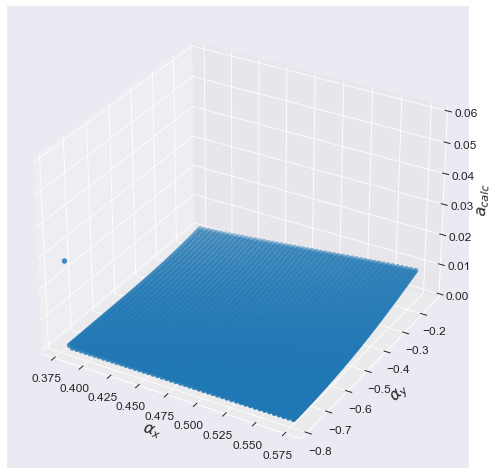

In [107]:
fig = plt.figure(figsize=(210/INCH, 297/INCH))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(alpha_list_x, alpha_list_y, a_calc_list)
ax.set_zlim(0, 0.06)
ax.set_xlabel(r'$\alpha_x$', fontsize=16)
ax.set_ylabel(r'$\alpha_y$', fontsize=16)
ax.set_zlabel(r'$a_{calc}$', fontsize=16)

<u>**Вывод:**</u> максимальное значение расчетного уровня значимости при проверке гипотезы о нормальности распределения остатков по критерию Эппса-Палли внутри прямоугольной области допустимых значений параметров степенного преобразования не превышает 0.05, то есть гипотеза о нормальности распределения остатков ОТВЕРГАЕТСЯ внутри всей прямоугольной области допустимых значений. **Степенное преобразование не позволяет нам получить регрессионную модель с нормально распределенными остатками**. Наша попытка окончилась неудачей.

Можно, конечно, пробовать другие преобразования, но в данном обзоре мы этим заниматься не будем. Отрицательный результат - тоже результат.

### <center> <u>***Сравнение результатов***</u>

Итак, сравним полученные нами регрессионные модели:

|№  |Модель                                    |Уравнение                |$R^2$ |MSPE |MAPE |Остатки      |Гетероскед.|Автокорр.|AIC    |BIC    |
|:-:|:----------------------------------------:|:-----------------------:|:----:|:---:|:---:|:-----------:|:---------:|:-------:|:-----:|:-----:|
|1  |исходные данные без изменения             |$Y=11.894-0.00219\cdot X$|0.4306|1.75%|9.12%|not gaussian |           |нет      | 170.53| 174.35|
|2  |преобразование Бокса-Кокса                |$\tilde Y=1.4702-0.0022\cdot\tilde X \\ \lambda_y=-0.5126 \quad \lambda_x=0.5064$ |0.5343|1.29%|7.89%|not gaussian |   |нет|-190.16|-186.33|
|3  |преобразование Бокса-Кокса с искл.выбросов|$\tilde Y=1.4512-0.00186\cdot\tilde X \\ \lambda_y=-0.5126 \quad \lambda_x=0.5064$|0.5033|1.36%|8.11%|gaussian     |нет|нет|-200.62|-196.88|

**Информационный критерий Акаике (AIC)** и **байесовский информационный критерий (BIC)** свидетельствуют о том, что модель №3 является наилучшей.

Сводный график все полученных нами регрессионных моделей:

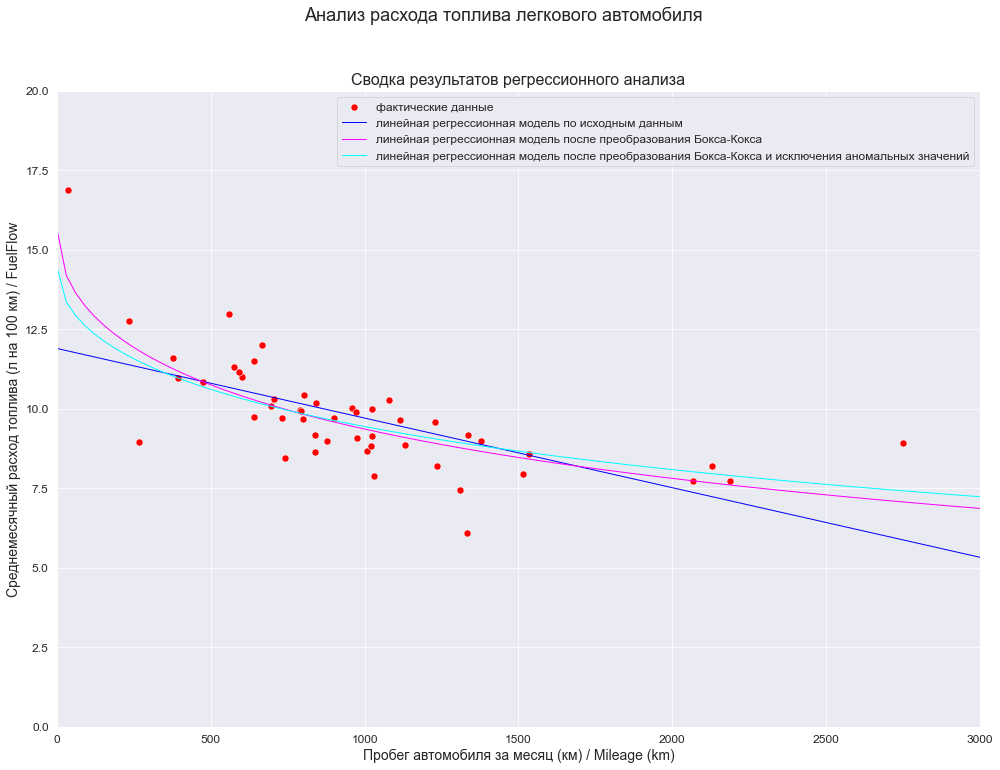

In [108]:
X = np.array(data_df['Mileage'])
Y = np.array(data_df['FuelFlow'])

Xmin=X_min_graph
Xmax=X_max_graph
Ymin=Y_min_graph
Ymax=Y_max_graph

fig, axes = plt.subplots(figsize=(420/INCH, 297/INCH))
title_figure=Task_Project
fig.suptitle(title_figure, fontsize = 18)
title_axes = 'Сводка результатов регрессионного анализа'
axes.set_title(title_axes, fontsize = 16)

# фактические данные
sns.scatterplot(
    x=X, y=Y,
    label='фактические данные',
    s=50,
    color='red',
    ax=axes)

# график регрессионной модели 1
nx = 100
hx = (Xmax - Xmin)/(nx - 1)
x1 = np.linspace(Xmin, Xmax, nx)
y1 = regr_model_linear_ols_func(x1)
sns.lineplot(
    x=x1, y=y1,
    color='blue',
    linewidth=1,
    legend=True,
    label='линейная регрессионная модель по исходным данным',
    ax=axes)

# график регрессионной модели 2
y2 = inverse_regr_model_linear_boxcox_ols_func(x1)
sns.lineplot(
    x=x1, y=y2,
    color='magenta',
    linewidth=1,
    legend=True,
    label='линейная регрессионная модель после преобразования Бокса-Кокса',
    ax=axes)

# график регрессионной модели 3
y3 = inverse_regr_model_linear_boxcox_clear_ols_func(x1)
sns.lineplot(
    x=x1, y=y3,
    color='cyan',
    linewidth=1,
    legend=True,
    label='линейная регрессионная модель после преобразования Бокса-Кокса и исключения аномальных значений',
    ax=axes)

axes.set_xlim(Xmin, Xmax)
axes.set_ylim(Ymin, Ymax)
axes.set_xlabel(Variable_Name_X1, fontsize = 14)
axes.set_ylabel(Variable_Name_Y, fontsize = 14)
axes.legend(prop={'size': 12})

plt.show()

<u>**Результаты сравнения моделей:**</u>
1. Получены несколько линейных регрессионных моделей (№№1-3).
2. Все модели обеспечивают удовлетворительное качество аппроксимации исходных данных.
3. Только модель №3 обеспечивает нормальность распределения остатков и отсутствие гетероскедастичности.

<u>**Вывод:**</u> для использования рекомендуется <u>регрессионная модель №3</u>.

### <center> <font size="6"> <u>***ИТОГИ***</u>

Итак, подведем итоги:
* мы рассмотрели особенности регрессионного анализа для **простой линейной регрессии (simple linear regression)** в случае, когда исходные данные не подчиняются нормальному закону распределения с использованием преобразования **Бокса-Кокса**;
* рассмотрели возможную методику подбора параметра **степенного преобразования** к нормальному закону распределения (хоть в случае наших исходных данных такое преобразование и не привело к удачному результату);
* разобрали способы проверки тренда и случайности, которые необходимы при работе с данными, выраженными в виде временных рядов;
* также предложен ряд пользовательских функций, облегчающих работу исследователя и уменьшающих размер программного кода.

Само собой, мы рассмотрели в рамках данного обзора довольно простую математическую модель, но принципы и подходы остаются неизменными и для моделей более высокой сложности.
Дальнейшие темы для рассмотрения - построение нелинейных регрессионных моделей, а также непараметрические методы регрессионного анализа.

Исходный код находится в моем репозитории на GitHub (https://github.com/AANazarov/Statistical-methods).

Надеюсь, данный обзор поможет специалистам **DataScience** в работе.

### <center> <font size="6"> <u>***ЛИТЕРАТУРА***</u>

1. Кобзарь А.И. Прикладная математическая статистика. Для инженеров и научных работников. - М.: ФИЗМАТЛИТ, 2006. - 816 с.
2. Болшев Л.Н., Смирнов Н.В. Таблицы математической статистики. - М.: Наука. Главная редакция физико-математической литературы, 1983. - 416 с.
3. Лемешко Б.Ю. и др. Статистический анализ данных, моделирование и исследование вероятностных закономерностей. Компьютерный подход. - Новосибирск: Изд-во НГТУ, 2011. - 888 с.
4. Лемешко Б.Ю. Критерии проверки отклонения распределения от нормального закона. Руководство по применению. - 2-е изд., перераб. и доп. - Москва: ИНФРА-М, 2023. - 353 с.
5. Лемешко Б.Ю., Веретельникова И.В. Критерии проверки гипотез о случайности и отсутствии тренда. Руководство по применению. - Москва: ИНФРА-М, 2021. - 221 с.
6. Айвазян С.А. и др. Прикладная статистика: Основы моделирования и первичная обработка данных. - М.: Финансы и статистика, 1983. - 471 с.
7. Айвазян С.А. и др. Прикладная статистика: Исследование зависимостей. - М.: Финансы и статистика, 1985. - 487 с.
8. Айвазян С.А. Прикладная статистика. Основы эконометрики: В 2 т. - Т.2: Основы эконометрики. - 2-е изд., испр. - М.: ЮНИТИ-ДАНА, 2001. - 432 с.
9. Сидоренко Е.В. Методы математической обработки в психологии. - СПб.: ООО "Речь", 2002. - 350 с.
10. Котеров А.Н. и др. Сила связи. Сообщение 2. Градации величины корреляции. - Медицинская радиология и радиационная безопасность. 2019. Том 64. № 6. с.12–24 (https://medradiol.fmbafmbc.ru/journal_medradiol/abstracts/2019/6/12-24_Koterov_et_al.pdf).
11. Вучков И. и др. Прикладной линейный регрессионный анализ / пер. с болг. - М.: Финансы и статистика, 1987. - 239 с.
12. Фёрстер Э., Рёнц Б. Методы корреляционного и регрессионного анализа / пер с нем. - М.: Финансы и статистика, 1983. - 302 с.
13. Четыркин Е.М. Статистические методы прогнозирования. - М.: Статистика, 1977. - 200 с.
14. Львовский Е.Н. Статистические методы построения эмпирических формул. - М.: Высшая школа, 1988. - 239 с.

In [109]:
print(f"Общее время выполнения расчетов: {round(time.time() - start_time_0, 3)} c")

Общее время выполнения расчетов: 100.978 c
